In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as BS
import numpy as np

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### Macbeth - Full Text

#### Import using Folger Shakespeare Library's API

In [4]:
url = 'https://www.folgerdigitaltexts.org/Mac/text'

In [5]:
response = requests.get(url)

In [6]:
response.text

'<br/>\nWhen shall we three meet again?<br/>\nIn thunder, lightning, or in rain?<br/>\nWhen the hurly-burly’s done,<br/>\nWhen the battle’s lost and won.<br/>\nThat will be ere the set of sun.<br/>\nWhere the place?<br/>\nUpon the heath.<br/>\nThere to meet with Macbeth.<br/>\nI come, Graymalkin.<br/>\nPaddock calls.<br/>\nAnon.<br/>\nFair is foul, and foul is fair;<br/>\nHover through the fog and filthy air.<br/>\nWhat bloody man is that? He can report,<br/>\nAs seemeth by his plight, of the revolt<br/>\nThe newest state.<br/>\nThis is the sergeant<br/>\nWho, like a good and hardy soldier, fought<br/>\n’Gainst my captivity.—Hail, brave friend!<br/>\nSay to the King the knowledge of the broil<br/>\nAs thou didst leave it.<br/>\nDoubtful it stood,<br/>\nAs two spent swimmers that do cling together<br/>\nAnd choke their art. The merciless Macdonwald<br/>\n(Worthy to be a rebel, for to that<br/>\nThe multiplying villainies of nature<br/>\nDo swarm upon him) from the Western Isles<br/>\nOf

In [7]:
macbeth_soup = BS(response.text, "html.parser")

In [8]:
macbeth_soup

<br/>
When shall we three meet again?<br/>
In thunder, lightning, or in rain?<br/>
When the hurly-burly’s done,<br/>
When the battle’s lost and won.<br/>
That will be ere the set of sun.<br/>
Where the place?<br/>
Upon the heath.<br/>
There to meet with Macbeth.<br/>
I come, Graymalkin.<br/>
Paddock calls.<br/>
Anon.<br/>
Fair is foul, and foul is fair;<br/>
Hover through the fog and filthy air.<br/>
What bloody man is that? He can report,<br/>
As seemeth by his plight, of the revolt<br/>
The newest state.<br/>
This is the sergeant<br/>
Who, like a good and hardy soldier, fought<br/>
’Gainst my captivity.—Hail, brave friend!<br/>
Say to the King the knowledge of the broil<br/>
As thou didst leave it.<br/>
Doubtful it stood,<br/>
As two spent swimmers that do cling together<br/>
And choke their art. The merciless Macdonwald<br/>
(Worthy to be a rebel, for to that<br/>
The multiplying villainies of nature<br/>
Do swarm upon him) from the Western Isles<br/>
Of kerns and gallowglasses is s

In [9]:
macbeth_full_text = macbeth_soup.get_text()

In [10]:
macbeth_full_text = macbeth_full_text.splitlines()

In [11]:
macbeth_full_text = [line.strip() for line in macbeth_full_text if line.strip()]

In [12]:
macbeth_full_text

['When shall we three meet again?',
 'In thunder, lightning, or in rain?',
 'When the hurly-burly’s done,',
 'When the battle’s lost and won.',
 'That will be ere the set of sun.',
 'Where the place?',
 'Upon the heath.',
 'There to meet with Macbeth.',
 'I come, Graymalkin.',
 'Paddock calls.',
 'Anon.',
 'Fair is foul, and foul is fair;',
 'Hover through the fog and filthy air.',
 'What bloody man is that? He can report,',
 'As seemeth by his plight, of the revolt',
 'The newest state.',
 'This is the sergeant',
 'Who, like a good and hardy soldier, fought',
 '’Gainst my captivity.—Hail, brave friend!',
 'Say to the King the knowledge of the broil',
 'As thou didst leave it.',
 'Doubtful it stood,',
 'As two spent swimmers that do cling together',
 'And choke their art. The merciless Macdonwald',
 '(Worthy to be a rebel, for to that',
 'The multiplying villainies of nature',
 'Do swarm upon him) from the Western Isles',
 'Of kerns and gallowglasses is supplied;',
 'And Fortune, on hi

In [13]:
len(macbeth_full_text)

2453

In [14]:
macbeth_full_text[-10]

'As calling home our exiled friends abroad'

In [15]:
macbeth_full_text_df = pd.DataFrame({
    'line_number': np.arange(1, len(macbeth_full_text)+1, dtype=int),
    'text': macbeth_full_text
})

In [16]:
macbeth_full_text_df

,line_number,text
0,1,When shall we three meet again?
1,2,"In thunder, lightning, or in rain?"
2,3,"When the hurly-burly’s done,"
3,4,When the battle’s lost and won.
4,5,That will be ere the set of sun.
...,...,...
2448,2449,"Took off her life)—this, and what needful else"
2449,2450,"That calls upon us, by the grace of grace,"
2450,2451,"We will perform in measure, time, and place."
2451,2452,"So thanks to all at once and to each one,"


#### Create a list of tuples to provide Act, Scene, Start and End. This maps the play in its entirety to let me know which lines belong to whcih act and scene.

In [17]:
scene_data = [
    ("1", "1", 1, 13),
    ("1", "2", 14, 91),
    ("1", "3", 92, 266),
    ("1", "4", 267, 331),
    ("1", "5", 332, 417),
    ("1", "6", 418, 456),
    ("1", "7", 457, 552),
    ("2", "1", 553, 629),
    ("2", "2", 630, 724),
    ("2", "3", 725, 896),
    ("2", "4", 897, 952),
    ("3", "1", 953, 1114),
    ("3", "2", 1115, 1177),
    ("3", "3", 1178, 1210),
    ("3", "4", 1211, 1386),
    ("3", "5", 1387, 1422),
    ("3", "6", 1423, 1478),
    ("4", "1", 1479, 1655),
    ("4", "2", 1656, 1753),
    ("4", "3", 1754, 2035),
    ("5", "1", 2036, 2119),
    ("5", "2", 2120, 2156),
    ("5", "3", 2157, 2232),
    ("5", "4", 2233, 2259),
    ("5", "5", 2260, 2318),
    ("5", "6", 2319, 2329),
    ("5", "7", 2330, 2365),
    ("5", "8", 2366, 2453)
]

In [18]:
scene_df = pd.DataFrame(scene_data, columns=['act', 'scene', 'start', 'end']).astype(int)

In [19]:
scene_df.head()

,act,scene,start,end
0,1,1,1,13
1,1,2,14,91
2,1,3,92,266
3,1,4,267,331
4,1,5,332,417


##### Create a special index made of intervals for every row in the Scene Dataframe. (28 labeled 'bins' - one per scene.)
##### iv.get_indexer looks at each value in the macbeth_df 'line_number' column and returns the position of the interval in the above code that contains that line. So you end up with a NumPy array of integers with length = number of lines.

In [20]:
iv = pd.IntervalIndex.from_arrays(scene_df['start'], scene_df['end'], closed='both')

In [21]:
idx = iv.get_indexer(macbeth_full_text_df['line_number'])

##### Use idx to vector-map scene metadata onto every line (without having to use loops). .to_numpy() strips labels and gives a Numpy array so that the indexing is faster and positional. And will allow me to index without realignment.

In [22]:
macbeth_full_text_df['act'] = scene_df['act'].to_numpy()[idx]

In [23]:
macbeth_full_text_df['scene'] = scene_df['scene'].to_numpy()[idx]

In [24]:
macbeth_full_text_df['scene_id'] = (idx + 1).astype(int)

In [25]:
macbeth_full_text_df['act_scene'] = (
    'Act ' + macbeth_full_text_df['act'].astype(str) + ', Scene ' + macbeth_full_text_df['scene'].astype(str)
)

In [26]:
macbeth_full_text_df.head()

,line_number,text,act,scene,scene_id,act_scene
0,1,When shall we three meet again?,1,1,1,"Act 1, Scene 1"
1,2,"In thunder, lightning, or in rain?",1,1,1,"Act 1, Scene 1"
2,3,"When the hurly-burly’s done,",1,1,1,"Act 1, Scene 1"
3,4,When the battle’s lost and won.,1,1,1,"Act 1, Scene 1"
4,5,That will be ere the set of sun.,1,1,1,"Act 1, Scene 1"


##### Note about VADER is "tuned" for modern English. Shakespearean diction can misfire. We're using this tool as a proxy, not as absolute truth.

##### Create one VADER analyzer to reuse for every line. (VADER runs on every line and then returns a dictionary w/ neg, neu, pos, compound.)
##### The dictionary per row is then turned into four columns. Then we rename the columns for clarity.

In [27]:
analyzer = SentimentIntensityAnalyzer()

In [28]:
vader_cols_full_play = (
    macbeth_full_text_df["text"]
    .apply(lambda t: analyzer.polarity_scores(t))
    .apply(pd.Series)
    .rename(columns={"neg": "play_neg", "neu": "play_neu", "pos": "play_pos", "compound": "play_compound"})
)

In [29]:
macbeth_full_text_df = pd.concat([macbeth_full_text_df, vader_cols_full_play], axis=1)

##### Create a function that classifies each line as positve/negative/neutral using VADER's recommended thresholds on the compound score.
##### Then create a new column that maps the labels onto the VADER compound number.

In [30]:
def _vader_label(c):
    if c > 0.05: return "pos"
    if c < -0.05: return "neg"
    return "neu"

In [31]:
macbeth_full_text_df['play_vader_label'] = macbeth_full_text_df['play_compound'].map(_vader_label)

In [32]:
macbeth_full_text_df["rolling_compound"] = (
    macbeth_full_text_df["play_compound"]
    .rolling(window=21, center=True, min_periods=1)
    .mean()
)

In [33]:
macbeth_full_text_df

,line_number,text,act,scene,scene_id,act_scene,play_neg,play_neu,play_pos,play_compound,play_vader_label,rolling_compound
0,1,When shall we three meet again?,1,1,1,"Act 1, Scene 1",0.00,1.000,0.000,0.0000,neu,0.030909
1,2,"In thunder, lightning, or in rain?",1,1,1,"Act 1, Scene 1",0.00,1.000,0.000,0.0000,neu,0.074783
2,3,"When the hurly-burly’s done,",1,1,1,"Act 1, Scene 1",0.00,1.000,0.000,0.0000,neu,0.069031
3,4,When the battle’s lost and won.,1,1,1,"Act 1, Scene 1",0.23,0.400,0.370,0.3400,pos,0.032643
4,5,That will be ere the set of sun.,1,1,1,"Act 1, Scene 1",0.00,1.000,0.000,0.0000,neu,0.030467
...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2449,"Took off her life)—this, and what needful else",5,8,28,"Act 5, Scene 8",0.00,1.000,0.000,0.0000,neu,0.030887
2449,2450,"That calls upon us, by the grace of grace,",5,8,28,"Act 5, Scene 8",0.00,0.556,0.444,0.6808,pos,0.033093
2450,2451,"We will perform in measure, time, and place.",5,8,28,"Act 5, Scene 8",0.00,1.000,0.000,0.0000,neu,0.035638
2451,2452,"So thanks to all at once and to each one,",5,8,28,"Act 5, Scene 8",0.00,0.738,0.262,0.4927,pos,0.038608


In [34]:
macbeth_full_text_df = macbeth_full_text_df.rename(columns={'rolling_compound': 'play_rolling_compound_wide'})

In [35]:
macbeth_full_text_df["play_rolling_compound_narrow"] = (
    macbeth_full_text_df["play_compound"]
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [36]:
macbeth_full_text_df['play_vader_label'].value_counts()

play_vader_label
neu    1271
pos     648
neg     534
Name: count, dtype: int64

In [37]:
macbeth_full_text_df['play_compound'].min()

-0.9468

In [38]:
macbeth_full_text_df.loc[(macbeth_full_text_df.play_compound == -0.9468)]

,line_number,text,act,scene,scene_id,act_scene,play_neg,play_neu,play_pos,play_compound,play_vader_label,play_rolling_compound_wide,play_rolling_compound_narrow
1820,1821,Of horrid hell can come a devil more damned,4,3,20,"Act 4, Scene 3",0.755,0.245,0.0,-0.9468,neg,-0.148976,-0.352709


In [39]:
macbeth_full_text_df['play_compound'].max()

0.9274

In [40]:
macbeth_full_text_df.loc[(macbeth_full_text_df.play_compound == 0.9274)]

,line_number,text,act,scene,scene_id,act_scene,play_neg,play_neu,play_pos,play_compound,play_vader_label,play_rolling_compound_wide,play_rolling_compound_narrow
859,860,"That had a heart to love, and in that heart",2,3,10,"Act 2, Scene 3",0.0,0.357,0.643,0.9274,pos,0.06599,0.131464


##### Create a dictionary to hold when scenes start for vertical lines on charts.

In [41]:
act_starts = {}
for act, scene, start, _ in scene_data:
    if act not in act_starts:
        act_starts[act] = start

In [42]:
roman = {1:"I",2:"II",3:"III",4:"IV",5:"V"}

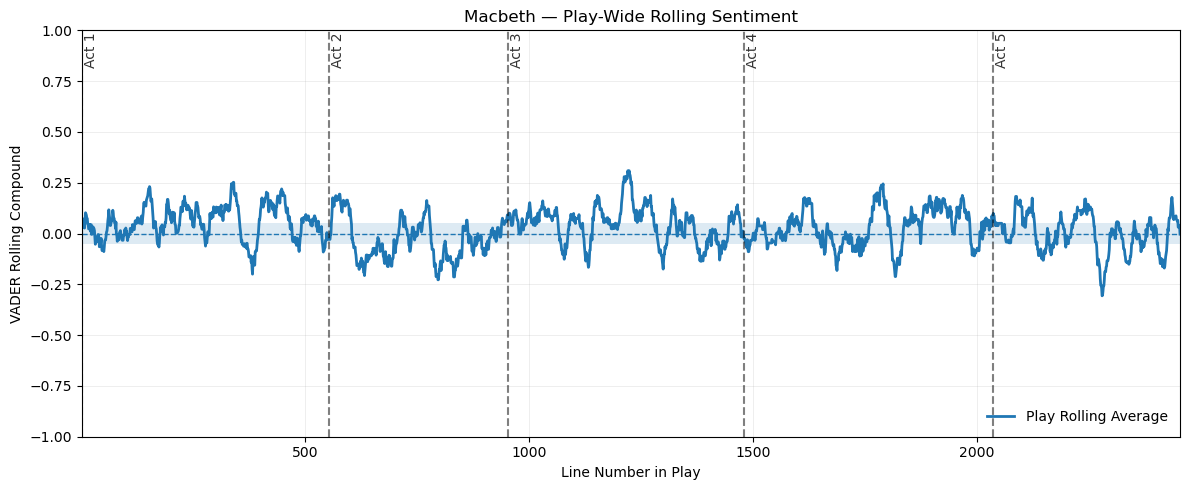

In [43]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(macbeth_full_text_df['line_number'], macbeth_full_text_df['play_rolling_compound_wide'], linewidth=2, label='Play Rolling Average')

ax.axhspan(-0.05, 0.05, alpha=0.15, zorder=0)
ax.axhline(0, linestyle='--', linewidth=1)

ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(), macbeth_full_text_df['line_number'].max())
ax.set_xlabel('Line Number in Play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title('Macbeth — Play-Wide Rolling Sentiment')

for act, start_line in act_starts.items():
    plt.axvline(start_line, color='black', linestyle='--', alpha=0.5)
    plt.text(start_line + 5, 0.9, f"Act {act}", rotation=90, verticalalignment='center', fontsize=10, alpha=0.8)
    
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

### Macbeth's Lines & Emotional Arc Via VADER

In [44]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Macbeth.html"

In [45]:
response = requests.get(url)

In [46]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nSo foul and fair a day I have not seen.<br/>\r\nSpeak if you can. What are you?<br/>\r\nStay, you imperfect speakers. Tell me more.<br/>\r\nBy Sinel’s death I know I am Thane of Glamis.<br/>\r\nBut how of Cawdor? The Thane of Cawdor lives<br/>\r\nA prosperous gentleman, and to be king<br/>\r\nStands not within the prospect of belief,<br/>\r\nNo more than to be Cawdor. Say from whence<br/>\r\nYou owe this strange intelligence or why<br/>\r\nUpon this blasted heath you stop our way<br/>\r\nWith such prophetic greeting. Speak, I charge you.<br/>\r\nInto the air, and what seemed corporal melted,<br/>\r\nAs breath into the wind. Would they had stayed!<br/>\r\nYour children shall be kings.<br/>\r\nAnd Thane of Cawdor too. Went it not so?<br/>\r\nThe Thane of Cawdor lives. Why do you dress me<br/>\r\nIn borrowed robes?<br/>\r\nGlamis and Thane of Cawdor!<br/>\r\nThe greatest is behind. Thanks for your pains.<br/>\r\n

In [47]:
macbeth_soup = BS(response.text, "html.parser")

In [48]:
macbeth_soup

<html>
<head>
<meta charset="utf-8"/>
</head>
<body>
<br/>
So foul and fair a day I have not seen.<br/>
Speak if you can. What are you?<br/>
Stay, you imperfect speakers. Tell me more.<br/>
By Sinel’s death I know I am Thane of Glamis.<br/>
But how of Cawdor? The Thane of Cawdor lives<br/>
A prosperous gentleman, and to be king<br/>
Stands not within the prospect of belief,<br/>
No more than to be Cawdor. Say from whence<br/>
You owe this strange intelligence or why<br/>
Upon this blasted heath you stop our way<br/>
With such prophetic greeting. Speak, I charge you.<br/>
Into the air, and what seemed corporal melted,<br/>
As breath into the wind. Would they had stayed!<br/>
Your children shall be kings.<br/>
And Thane of Cawdor too. Went it not so?<br/>
The Thane of Cawdor lives. Why do you dress me<br/>
In borrowed robes?<br/>
Glamis and Thane of Cawdor!<br/>
The greatest is behind. Thanks for your pains.<br/>
Do you not hope your children shall be kings,<br/>
When those that gave the

In [49]:
macbeth_lines = macbeth_soup.get_text()

In [50]:
macbeth_lines = macbeth_lines.splitlines()

In [51]:
macbeth_lines = [ln.strip() for ln in macbeth_lines if ln.strip()]

In [52]:
macbeth_lines

['So foul and fair a day I have not seen.',
 'Speak if you can. What are you?',
 'Stay, you imperfect speakers. Tell me more.',
 'By Sinel’s death I know I am Thane of Glamis.',
 'But how of Cawdor? The Thane of Cawdor lives',
 'A prosperous gentleman, and to be king',
 'Stands not within the prospect of belief,',
 'No more than to be Cawdor. Say from whence',
 'You owe this strange intelligence or why',
 'Upon this blasted heath you stop our way',
 'With such prophetic greeting. Speak, I charge you.',
 'Into the air, and what seemed corporal melted,',
 'As breath into the wind. Would they had stayed!',
 'Your children shall be kings.',
 'And Thane of Cawdor too. Went it not so?',
 'The Thane of Cawdor lives. Why do you dress me',
 'In borrowed robes?',
 'Glamis and Thane of Cawdor!',
 'The greatest is behind. Thanks for your pains.',
 'Do you not hope your children shall be kings,',
 'When those that gave the Thane of Cawdor to me',
 'Promised no less to them?',
 'Two truths are told'

#### Semi-join to keep only the lines from macbeth_df whose text appears in macbeth_lines.

In [53]:
macbeth_only_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(macbeth_lines)].copy()

In [54]:
macbeth_only_df

,line_number,text,act,scene,scene_id,act_scene,play_neg,play_neu,play_pos,play_compound,play_vader_label,play_rolling_compound_wide,play_rolling_compound_narrow
129,130,So foul and fair a day I have not seen.,1,3,3,"Act 1, Scene 3",0.000,0.778,0.222,0.3744,pos,0.051124,0.058291
140,141,Speak if you can. What are you?,1,3,3,"Act 1, Scene 3",0.000,1.000,0.000,0.0000,neu,0.136119,0.059882
163,164,"Stay, you imperfect speakers. Tell me more.",1,3,3,"Act 1, Scene 3",0.277,0.723,0.000,-0.3182,neg,0.045067,-0.016455
164,165,By Sinel’s death I know I am Thane of Glamis.,1,3,3,"Act 1, Scene 3",0.302,0.698,0.000,-0.5994,neg,0.059210,-0.024455
165,166,But how of Cawdor? The Thane of Cawdor lives,1,3,3,"Act 1, Scene 3",0.000,1.000,0.000,0.0000,neu,0.030062,-0.055709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398,2399,And to be baited with the rabble’s curse.,5,8,28,"Act 5, Scene 8",0.333,0.667,0.000,-0.5423,neg,0.024629,-0.102264
2399,2400,Though Birnam Wood be come to Dunsinane,5,8,28,"Act 5, Scene 8",0.000,1.000,0.000,0.0000,neu,0.024629,-0.042291
2400,2401,"And thou opposed, being of no woman born,",5,8,28,"Act 5, Scene 8",0.239,0.761,0.000,-0.2960,neg,-0.004619,-0.042291
2401,2402,Yet I will try the last. Before my body,5,8,28,"Act 5, Scene 8",0.000,1.000,0.000,0.0000,neu,-0.049433,0.017618


In [55]:
macbeth_only_df = macbeth_only_df.reset_index(drop=True)

In [56]:
macbeth_only_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [57]:
macbeth_only_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [58]:
macbeth_only_df = macbeth_only_df.rename(columns={'play_neg': 'mac_neg', 'play_neu': 'mac_neu', 'play_pos': 'mac_pos', 'play_vader_label': 'mac_vader_label', 'play_compound': 'mac_compound'})

In [59]:
macbeth_only_df

,line_number,text,act,scene,scene_id,act_scene,mac_neg,mac_neu,mac_pos,mac_compound,mac_vader_label
0,130,So foul and fair a day I have not seen.,1,3,3,"Act 1, Scene 3",0.000,0.778,0.222,0.3744,pos
1,141,Speak if you can. What are you?,1,3,3,"Act 1, Scene 3",0.000,1.000,0.000,0.0000,neu
2,164,"Stay, you imperfect speakers. Tell me more.",1,3,3,"Act 1, Scene 3",0.277,0.723,0.000,-0.3182,neg
3,165,By Sinel’s death I know I am Thane of Glamis.,1,3,3,"Act 1, Scene 3",0.302,0.698,0.000,-0.5994,neg
4,166,But how of Cawdor? The Thane of Cawdor lives,1,3,3,"Act 1, Scene 3",0.000,1.000,0.000,0.0000,neu
...,...,...,...,...,...,...,...,...,...,...,...
640,2399,And to be baited with the rabble’s curse.,5,8,28,"Act 5, Scene 8",0.333,0.667,0.000,-0.5423,neg
641,2400,Though Birnam Wood be come to Dunsinane,5,8,28,"Act 5, Scene 8",0.000,1.000,0.000,0.0000,neu
642,2401,"And thou opposed, being of no woman born,",5,8,28,"Act 5, Scene 8",0.239,0.761,0.000,-0.2960,neg
643,2402,Yet I will try the last. Before my body,5,8,28,"Act 5, Scene 8",0.000,1.000,0.000,0.0000,neu


In [60]:
macbeth_only_df = macbeth_only_df.rename(columns={'mac_neg': 'neg', 'mac_neu': 'neu', 'mac_pos': 'pos', 'mac_vader_label': 'vader_label', 'mac_compound': 'compound'})

In [61]:
macbeth_only_df["vader_label"].value_counts()

vader_label
neu    323
pos    174
neg    148
Name: count, dtype: int64

In [62]:
macbeth_only_df["compound"].min()

-0.8807

In [63]:
macbeth_only_df.loc[(macbeth_only_df.compound == -0.8807)]

,line_number,text,act,scene,scene_id,act_scene,neg,neu,pos,compound,vader_label
141,614,"Nature seems dead, and wicked dreams abuse",2,1,8,"Act 2, Scene 1",0.676,0.17,0.153,-0.8807,neg


In [64]:
macbeth_only_df["compound"].max()

0.9274

In [65]:
macbeth_only_df.loc[(macbeth_only_df.compound == 0.9274)]

,line_number,text,act,scene,scene_id,act_scene,neg,neu,pos,compound,vader_label
208,860,"That had a heart to love, and in that heart",2,3,10,"Act 2, Scene 3",0.0,0.357,0.643,0.9274,pos


In [66]:
high_threshold = 0.75
low_threshold = -0.75

In [67]:
emotional_highs_macbeth = macbeth_only_df[macbeth_only_df["compound"] >= high_threshold]

In [68]:
emotional_lows_macbeth = macbeth_only_df[macbeth_only_df["compound"] <= low_threshold]

In [69]:
print("Emotional Highs:")
display(emotional_highs_macbeth[["line_number", "act", "scene", "compound", "text"]].head())

print("Emotional Lows:")
display(emotional_lows_macbeth[["line_number", "act", "scene", "compound", "text"]].head())

Emotional Highs:


,line_number,act,scene,compound,text
25,236,1,3,0.7906,Why hath it given me earnest of success
44,264,1,3,0.8225,Our free hearts each to other.
51,296,1,4,0.8834,Safe toward your love and honor.
62,398,1,5,0.8316,"My dearest love,"
83,474,1,7,0.8588,"So clear in his great office, that his virtues"


Emotional Lows:


,line_number,act,scene,compound,text
90,481,1,7,-0.7783,That tears shall drown the wind. I have no spur
141,614,2,1,-0.8807,"Nature seems dead, and wicked dreams abuse"
166,679,2,2,-0.7506,"The death of each day’s life, sore labor’s bath,"
329,1141,3,2,-0.8544,"Treason has done his worst; nor steel nor poison,"
395,1282,3,4,-0.8316,Which might appall the devil.


In [70]:
macbeth_only_df['rolling_compound'] = (
    macbeth_only_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

##### This shows how strong Macbeth's emotion is a local window, regardless of positive or negative. To do this, I took the absolute value of each line's VADER score so that highs and lows both count as "intense", then average the last 5 + current + 5 Macbeth lines so that I can show the "peaks" and "valley" of Macbeth's emotion.

In [71]:
macbeth_only_df['rolling_intensity']=(
    macbeth_only_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

##### This shows how unstable Macbeth's tone is from line to line. It looks at the standard deviation of the mac_compound column. Bigger spread = more whiplash between positive and negative lines. Spikes show mood swings, while flat sections suggest a steady tone.)

In [72]:
macbeth_only_df['rolling_volatility'] = (
    macbeth_only_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

##### This groups consecutive Macbeth lines into speeches. Whenever there is a gap between line_numbers greater than 1, it starts a "new speech." It cumulatively numbers the speeches from 0 upward. This will let me aggregate by Macbeth's turns of speaking, which might be useful for speech-level summaries and charts.

In [73]:
macbeth_only_df['speech_id'] = (macbeth_only_df['line_number'].diff().gt(1)).cumsum()

##### This up-weights lines with strong emotion so that they count more in later averages. To get this, I multiplied each line's sentiment by its magnitude. It will show a per-line score where dramatic lines have extra influence and mild lines contribute less.

In [74]:
macbeth_only_df['weighted_compound'] = (
    macbeth_only_df['compound'] * macbeth_only_df['compound'].abs()
)

##### This smooths the weighted sentiment by averaging the weighted compound values across the window established above. This will let big emotional moments pull the curve more than the regular rolling average.

In [75]:
macbeth_only_df['rolling_weighted'] = (
    macbeth_only_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

##### This turns the VADER label into simple 0/1 flags for positive and negative lines so that I can possibly create a "share of positive" or "share of negative" calculation.

In [76]:
macbeth_only_df['is_pos'] = (macbeth_only_df['vader_label']=='pos').astype(int)

In [77]:
macbeth_only_df['is_neg'] = (macbeth_only_df['vader_label']=='neg').astype(int)

##### This shows the balance of positive vs. negative lines in each window. It takes the average of "is_pos" minus the average of "is_neg).

In [78]:
macbeth_only_df['roll_pos_minus_neg'] = (
    macbeth_only_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - macbeth_only_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

##### This adds two columns that compares Macbeth's smooth sentiment to the play's smoothed baseline at the same spot in the script. I subtracted Macbeth's rolling score from the play's at the same line number. If it is positive, then Macbeth is "brighter" than the surrounding tone at that moment in the play. If it is negative, then Macbeth is "darker" than the surrounding tone.

In [79]:
sentiment_difference = macbeth_only_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [80]:
macbeth_only_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [81]:
macbeth_only_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [82]:
macbeth_only_df['rolling_within_speech'] = (
    macbeth_only_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [83]:
macbeth_only_df.insert(1, 'speaker', 'Macbeth')

In [84]:
macbeth_only_df.head()

,line_number,speaker,text,act,scene,scene_id,act_scene,neg,neu,pos,...,rolling_volatility,speech_id,weighted_compound,rolling_weighted,is_pos,is_neg,roll_pos_minus_neg,diff_vs_play_w21,diff_vs_play_w11,rolling_within_speech
0,130,Macbeth,So foul and fair a day I have not seen.,1,3,3,"Act 1, Scene 3",0.000,0.778,0.222,...,0.346680,0,0.140175,-0.015519,1,0,0.000000,-0.062207,-0.069374,0.374400
1,141,Macbeth,Speak if you can. What are you?,1,3,3,"Act 1, Scene 3",0.000,1.000,0.000,...,0.419102,1,0.000000,-0.020438,0,0,-0.142857,-0.177548,-0.101310,0.000000
2,164,Macbeth,"Stay, you imperfect speakers. Tell me more.",1,3,3,"Act 1, Scene 3",0.277,0.723,0.000,...,0.367999,2,-0.101251,-0.028835,0,1,-0.250000,-0.118317,-0.056795,-0.318200
3,165,Macbeth,By Sinel’s death I know I am Thane of Glamis.,1,3,3,"Act 1, Scene 3",0.302,0.698,0.000,...,0.402770,2,-0.359280,-0.017338,0,1,-0.111111,-0.093965,-0.010301,-0.458800
4,166,Macbeth,But how of Cawdor? The Thane of Cawdor lives,1,3,3,"Act 1, Scene 3",0.000,1.000,0.000,...,0.402940,2,0.000000,-0.024366,0,0,-0.200000,-0.090942,-0.005171,-0.305867


In [85]:
macbeth_only_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   line_number            645 non-null    int64  
 1   speaker                645 non-null    object 
 2   text                   645 non-null    object 
 3   act                    645 non-null    int64  
 4   scene                  645 non-null    int64  
 5   scene_id               645 non-null    int64  
 6   act_scene              645 non-null    object 
 7   neg                    645 non-null    float64
 8   neu                    645 non-null    float64
 9   pos                    645 non-null    float64
 10  compound               645 non-null    float64
 11  vader_label            645 non-null    object 
 12  rolling_compound       645 non-null    float64
 13  rolling_intensity      645 non-null    float64
 14  rolling_volatility     645 non-null    float64
 15  speech

#### Macbeth's Emotional Arc (Raw VADER Score)

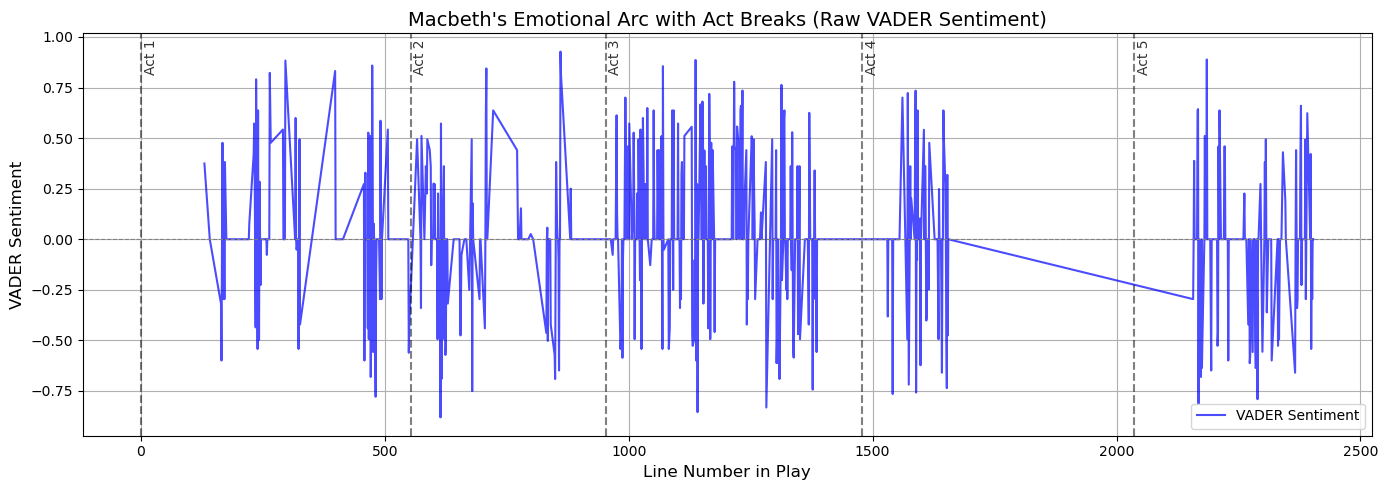

In [86]:
plt.figure(figsize=(14, 5))

plt.plot(macbeth_only_df["line_number"], macbeth_only_df["compound"], label="VADER Sentiment", color="blue", alpha=0.7)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

for act, start_line in act_starts.items():
    plt.axvline(start_line, color='black', linestyle='--', alpha=0.5)
    plt.text(start_line + 5, 0.9, f"Act {act}", rotation=90, verticalalignment='center', fontsize=10, alpha=0.8)

plt.title("Macbeth's Emotional Arc with Act Breaks (Raw VADER Sentiment)", fontsize=14)
plt.xlabel("Line Number in Play", fontsize=12)
plt.ylabel("VADER Sentiment", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

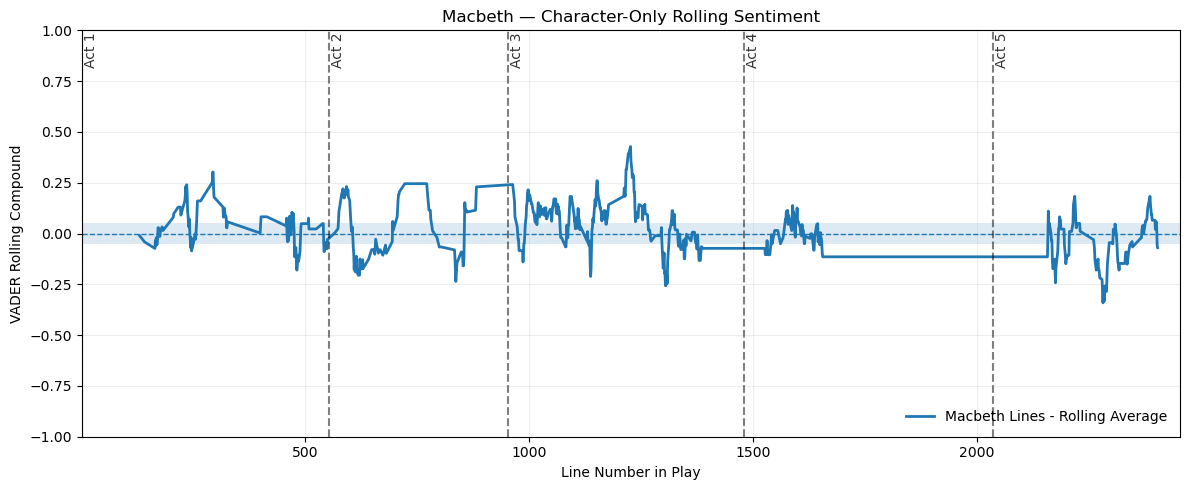

In [87]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(macbeth_only_df['line_number'], macbeth_only_df['rolling_compound'], linewidth=2, label='Macbeth Lines - Rolling Average')

ax.axhspan(-0.05, 0.05, alpha=0.15, zorder=0)
ax.axhline(0, linestyle='--', linewidth=1)

ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())
ax.set_xlabel('Line Number in Play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title('Macbeth — Character-Only Rolling Sentiment')

for act, start_line in act_starts.items():
    plt.axvline(start_line, color='black', linestyle='--', alpha=0.5)
    plt.text(start_line + 5, 0.9, f"Act {act}", rotation=90, verticalalignment='center', fontsize=10, alpha=0.8)
    
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

#### Macbeth's Character Arc vs. The Play

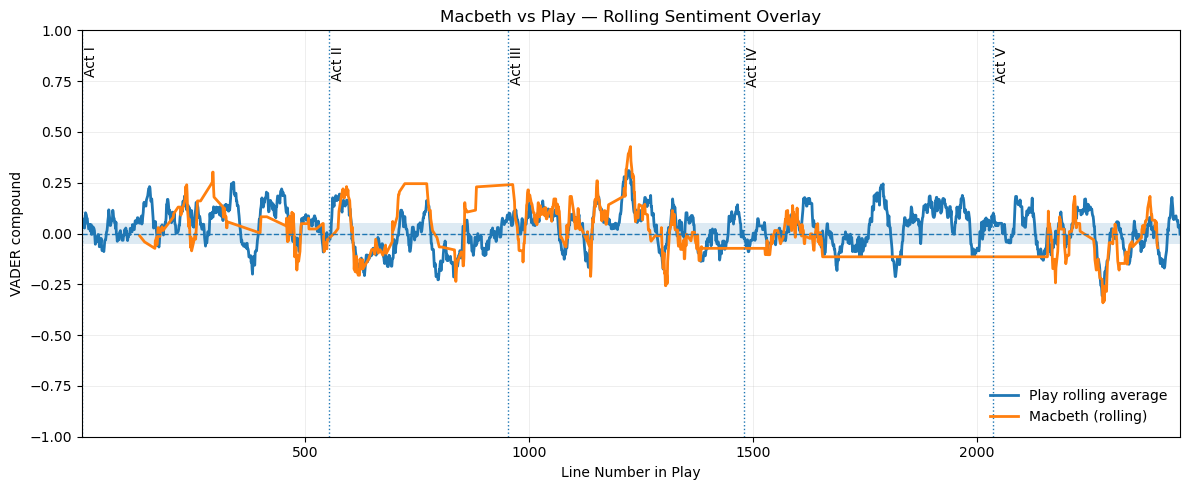

In [88]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(macbeth_full_text_df['line_number'], macbeth_full_text_df['play_rolling_compound_wide'], linewidth=2, label='Play rolling average')
ax.plot(macbeth_only_df['line_number'], macbeth_only_df['rolling_compound'], linewidth=2, label="Macbeth (rolling)")

ax.axhspan(-0.05, 0.05, alpha=0.15, zorder=0)
ax.axhline(0, linestyle='--', linewidth=1)

ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())
ax.set_xlabel('Line Number in Play')
ax.set_ylabel('VADER compound')
ax.set_title("Macbeth vs Play — Rolling Sentiment Overlay")

act_starts = macbeth_full_text_df.groupby('act')['line_number'].min()
roman = {1:'I',2:'II',3:'III',4:'IV',5:'V'}
for a, ln in act_starts.items():
    ax.axvline(ln, linestyle=':', linewidth=1)
    ax.text(ln + 5, 0.92*ax.get_ylim()[1], f'Act {roman.get(int(a), a)}',
            rotation=90, va='top', ha='left')

ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

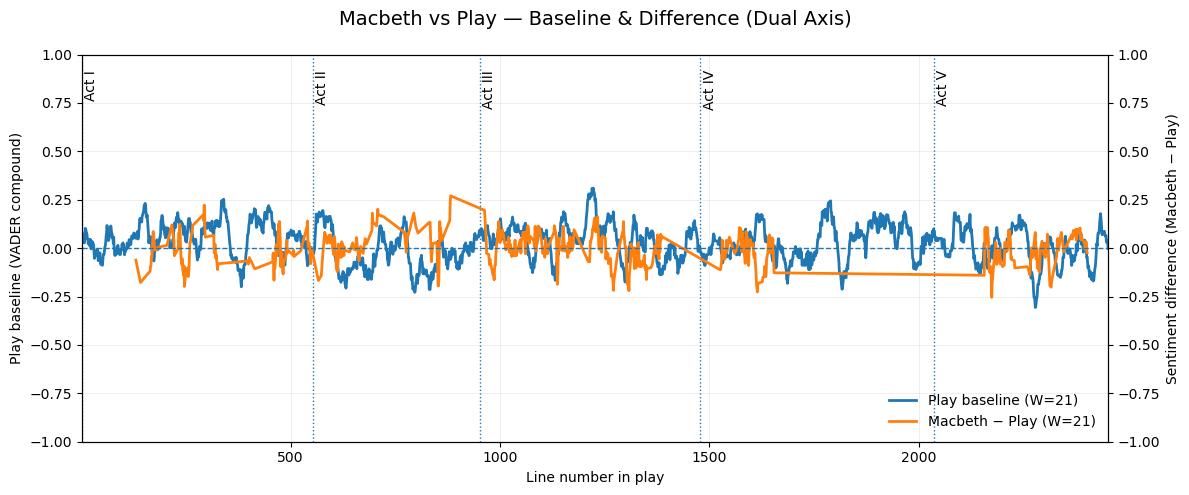

In [89]:
fig, ax1 = plt.subplots(figsize=(12,5))

ln1, = ax1.plot(
    macbeth_full_text_df['line_number'], macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, label='Play baseline (W=21)'
)
ax1.set_xlabel('Line number in play')
ax1.set_ylabel('Play baseline (VADER compound)')
ax1.set_xlim(macbeth_full_text_df['line_number'].min(), macbeth_full_text_df['line_number'].max())
ax1.set_ylim(-1, 1)
ax1.grid(True, linewidth=0.5, alpha=0.3)

ax2 = ax1.twinx()
ln2, = ax2.plot(
    macbeth_only_df['line_number'], macbeth_only_df['diff_vs_play_w21'],
    color='tab:orange', linewidth=2, label='Macbeth − Play (W=21)'
)
ax2.axhline(0, linestyle='--', linewidth=1)
ax2.set_ylabel('Sentiment difference (Macbeth − Play)')
ax2.set_ylim(-1, 1)

for act, start in act_starts.items():
    ax1.axvline(start, linestyle=':', linewidth=1)
    ax1.text(
        start + 5, 0.92 * ax1.get_ylim()[1],
        f'Act {roman[act]}', rotation=90, va='top', ha='left'
    )

lines = [ln1, ln2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right', frameon=False)

fig.suptitle("Macbeth vs Play — Baseline & Difference (Dual Axis)", fontsize=14)
fig.tight_layout()
plt.show()

### Lady MacBeth's Lines & Emotional Arc Via VADER

In [90]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_LadyMacbeth.html"

In [91]:
response = requests.get(url)

In [92]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nThey met me in the<br/>\r\nday of success, and I have learned by the perfect’st<br/>\r\nreport they have more in them than mortal knowledge.<br/>\r\nWhen I burned in desire to question them further, they<br/>\r\nmade themselves air, into which they vanished.<br/>\r\nWhiles I stood rapt in the wonder of it came missives<br/>\r\nfrom the King, who all-hailed me “Thane of Cawdor,”<br/>\r\nby which title, before, these Weïrd Sisters saluted me<br/>\r\nand referred me to the coming on of time with “Hail,<br/>\r\nking that shalt be.” This have I thought good to deliver<br/>\r\nthee, my dearest partner of greatness, that thou<br/>\r\nmight’st not lose the dues of rejoicing by being ignorant<br/>\r\nof what greatness is promised thee. Lay it to thy<br/>\r\nheart, and farewell.<br/>\r\nGlamis thou art, and Cawdor, and shalt be<br/>\r\nWhat thou art promised. Yet do I fear thy nature;<br/>\r\nIt is too full o’ th’ milk 

In [93]:
lady_macbeth_soup = BS(response.text, "html.parser")

In [94]:
lady_macbeth_soup

<html>
<head>
<meta charset="utf-8"/>
</head>
<body>
<br/>
They met me in the<br/>
day of success, and I have learned by the perfect’st<br/>
report they have more in them than mortal knowledge.<br/>
When I burned in desire to question them further, they<br/>
made themselves air, into which they vanished.<br/>
Whiles I stood rapt in the wonder of it came missives<br/>
from the King, who all-hailed me “Thane of Cawdor,”<br/>
by which title, before, these Weïrd Sisters saluted me<br/>
and referred me to the coming on of time with “Hail,<br/>
king that shalt be.” This have I thought good to deliver<br/>
thee, my dearest partner of greatness, that thou<br/>
might’st not lose the dues of rejoicing by being ignorant<br/>
of what greatness is promised thee. Lay it to thy<br/>
heart, and farewell.<br/>
Glamis thou art, and Cawdor, and shalt be<br/>
What thou art promised. Yet do I fear thy nature;<br/>
It is too full o’ th’ milk of human kindness<br/>
To catch the nearest way. Thou wouldst be g

In [95]:
lady_macbeth_lines = lady_macbeth_soup.get_text()

In [96]:
lady_macbeth_lines = lady_macbeth_lines.splitlines()

In [97]:
lady_macbeth_lines = [ln.strip() for ln in lady_macbeth_lines if ln.strip()]

In [98]:
lady_macbeth_lines

['They met me in the',
 'day of success, and I have learned by the perfect’st',
 'report they have more in them than mortal knowledge.',
 'When I burned in desire to question them further, they',
 'made themselves air, into which they vanished.',
 'Whiles I stood rapt in the wonder of it came missives',
 'from the King, who all-hailed me “Thane of Cawdor,”',
 'by which title, before, these Weïrd Sisters saluted me',
 'and referred me to the coming on of time with “Hail,',
 'king that shalt be.” This have I thought good to deliver',
 'thee, my dearest partner of greatness, that thou',
 'might’st not lose the dues of rejoicing by being ignorant',
 'of what greatness is promised thee. Lay it to thy',
 'heart, and farewell.',
 'Glamis thou art, and Cawdor, and shalt be',
 'What thou art promised. Yet do I fear thy nature;',
 'It is too full o’ th’ milk of human kindness',
 'To catch the nearest way. Thou wouldst be great,',
 'Art not without ambition, but without',
 'The illness should att

In [99]:
lady_macbeth_only_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(lady_macbeth_lines)].copy()

In [100]:
lady_macbeth_only_df.head()

,line_number,text,act,scene,scene_id,act_scene,play_neg,play_neu,play_pos,play_compound,play_vader_label,play_rolling_compound_wide,play_rolling_compound_narrow
331,332,They met me in the,1,5,5,"Act 1, Scene 5",0.0,1.000,0.000,0.0000,neu,0.143086,0.218155
332,333,"day of success, and I have learned by the perf...",1,5,5,"Act 1, Scene 5",0.0,0.709,0.291,0.5719,pos,0.171990,0.155355
333,334,report they have more in them than mortal know...,1,5,5,"Act 1, Scene 5",0.0,1.000,0.000,0.0000,neu,0.215014,0.155355
334,335,When I burned in desire to question them furth...,1,5,5,"Act 1, Scene 5",0.0,0.769,0.231,0.4019,pos,0.245343,0.162373
335,336,"made themselves air, into which they vanished.",1,5,5,"Act 1, Scene 5",0.0,1.000,0.000,0.0000,neu,0.221824,0.135582


In [101]:
lady_macbeth_only_df = lady_macbeth_only_df.reset_index(drop=True)

In [102]:
lady_macbeth_only_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [103]:
lady_macbeth_only_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [104]:
lady_macbeth_only_df = lady_macbeth_only_df.rename(columns={'play_neg': 'ladym_neg', 'play_neu': 'ladym_neu', 'play_pos': 'ladym_pos', 'play_vader_label': 'ladym_vader_label', 'play_compound': 'ladym_compound'})

In [105]:
lady_macbeth_only_df.head()

,line_number,text,act,scene,scene_id,act_scene,ladym_neg,ladym_neu,ladym_pos,ladym_compound,ladym_vader_label
0,332,They met me in the,1,5,5,"Act 1, Scene 5",0.0,1.000,0.000,0.0000,neu
1,333,"day of success, and I have learned by the perf...",1,5,5,"Act 1, Scene 5",0.0,0.709,0.291,0.5719,pos
2,334,report they have more in them than mortal know...,1,5,5,"Act 1, Scene 5",0.0,1.000,0.000,0.0000,neu
3,335,When I burned in desire to question them furth...,1,5,5,"Act 1, Scene 5",0.0,0.769,0.231,0.4019,pos
4,336,"made themselves air, into which they vanished.",1,5,5,"Act 1, Scene 5",0.0,1.000,0.000,0.0000,neu


In [106]:
lady_macbeth_only_df = lady_macbeth_only_df.rename(columns={'ladym_neg': 'neg', 'ladym_neu': 'neu', 'ladym_pos': 'pos', 'ladym_vader_label': 'vader_label', 'ladym_compound': 'compound'})

In [107]:
lady_macbeth_only_df["vader_label"].value_counts()

vader_label
neu    122
neg     59
pos     56
Name: count, dtype: int64

In [108]:
lady_macbeth_only_df["compound"].min()

-0.802

In [109]:
lady_macbeth_only_df.loc[(lady_macbeth_only_df.compound == -0.802)]

,line_number,text,act,scene,scene_id,act_scene,neg,neu,pos,compound,vader_label
142,700,"That fears a painted devil. If he do bleed,",2,2,9,"Act 2, Scene 2",0.507,0.493,0.0,-0.802,neg


In [110]:
lady_macbeth_only_df["compound"].max()

0.802

In [111]:
lady_macbeth_only_df.loc[(lady_macbeth_only_df.compound == 0.802)]

,line_number,text,act,scene,scene_id,act_scene,neg,neu,pos,compound,vader_label
180,1219,For my heart speaks they are welcome.,3,4,15,"Act 3, Scene 4",0.0,0.410,0.590,0.802,pos
184,1249,’Tis given with welcome. To feed were best at ...,3,4,15,"Act 3, Scene 4",0.0,0.526,0.474,0.802,pos


In [112]:
emotional_highs_lady_macbeth = lady_macbeth_only_df[lady_macbeth_only_df["compound"] >= high_threshold]

In [113]:
emotional_lows_lady_macbeth = lady_macbeth_only_df[lady_macbeth_only_df["compound"] <= low_threshold]

In [114]:
print("Emotional Highs:")
display(emotional_highs_lady_macbeth[["line_number", "act", "scene", "compound", "text"]].head())

print("Emotional Lows:")
display(emotional_lows_lady_macbeth[["line_number", "act", "scene", "compound", "text"]].head())

Emotional Highs:


,line_number,act,scene,compound,text
180,1219,3,4,0.802,For my heart speaks they are welcome.
184,1249,3,4,0.802,’Tis given with welcome. To feed were best at ...


Emotional Lows:


,line_number,act,scene,compound,text
102,534,1,7,-0.7717,"Their drenchèd natures lies as in a death,"
142,700,2,2,-0.8020,"That fears a painted devil. If he do bleed,"


In [115]:
lady_macbeth_only_df['rolling_compound'] = (
    lady_macbeth_only_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [116]:
lady_macbeth_only_df['rolling_intensity']=(
    lady_macbeth_only_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [117]:
lady_macbeth_only_df['rolling_volatility'] = (
    lady_macbeth_only_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [118]:
lady_macbeth_only_df['speech_id'] = (lady_macbeth_only_df['line_number'].diff().gt(1)).cumsum()

In [119]:
lady_macbeth_only_df['weighted_compound'] = (
    lady_macbeth_only_df['compound'] * lady_macbeth_only_df['compound'].abs()
)

In [120]:
lady_macbeth_only_df['rolling_weighted'] = (
    lady_macbeth_only_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [121]:
lady_macbeth_only_df['is_pos'] = (lady_macbeth_only_df['vader_label']=='pos').astype(int)

In [122]:
lady_macbeth_only_df['is_neg'] = (lady_macbeth_only_df['vader_label']=='neg').astype(int)

In [123]:
lady_macbeth_only_df['roll_pos_minus_neg'] = (
    lady_macbeth_only_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - lady_macbeth_only_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [124]:
sentiment_difference = lady_macbeth_only_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [125]:
lady_macbeth_only_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [126]:
lady_macbeth_only_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [127]:
lady_macbeth_only_df['rolling_within_speech'] = (
    lady_macbeth_only_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [128]:
lady_macbeth_only_df.insert(1, 'speaker', 'Lady Macbeth')

In [129]:
lady_macbeth_only_df.head()

,line_number,speaker,text,act,scene,scene_id,act_scene,neg,neu,pos,...,rolling_volatility,speech_id,weighted_compound,rolling_weighted,is_pos,is_neg,roll_pos_minus_neg,diff_vs_play_w21,diff_vs_play_w11,rolling_within_speech
0,332,Lady Macbeth,They met me in the,1,5,5,"Act 1, Scene 5",0.0,1.000,0.000,...,0.330187,0,0.000000,0.081432,0,0,0.333333,0.019214,-0.055855,0.000000
1,333,Lady Macbeth,"day of success, and I have learned by the perf...",1,5,5,"Act 1, Scene 5",0.0,0.709,0.291,...,0.289552,0,0.327070,0.069799,1,0,0.285714,-0.032876,-0.016240,0.285950
2,334,Lady Macbeth,report they have more in them than mortal know...,1,5,5,"Act 1, Scene 5",0.0,1.000,0.000,...,0.273375,0,0.000000,0.099911,0,0,0.375000,-0.023614,0.036045,0.190633
3,335,Lady Macbeth,When I burned in desire to question them furth...,1,5,5,"Act 1, Scene 5",0.0,0.769,0.231,...,0.273375,0,0.161524,0.129749,1,0,0.444444,-0.007765,0.075205,0.324600
4,336,Lady Macbeth,"made themselves air, into which they vanished.",1,5,5,"Act 1, Scene 5",0.0,1.000,0.000,...,0.179735,0,0.000000,0.129820,0,0,0.500000,0.028116,0.114358,0.133967


#### Lady Macbeth's Emotional Arc Charts

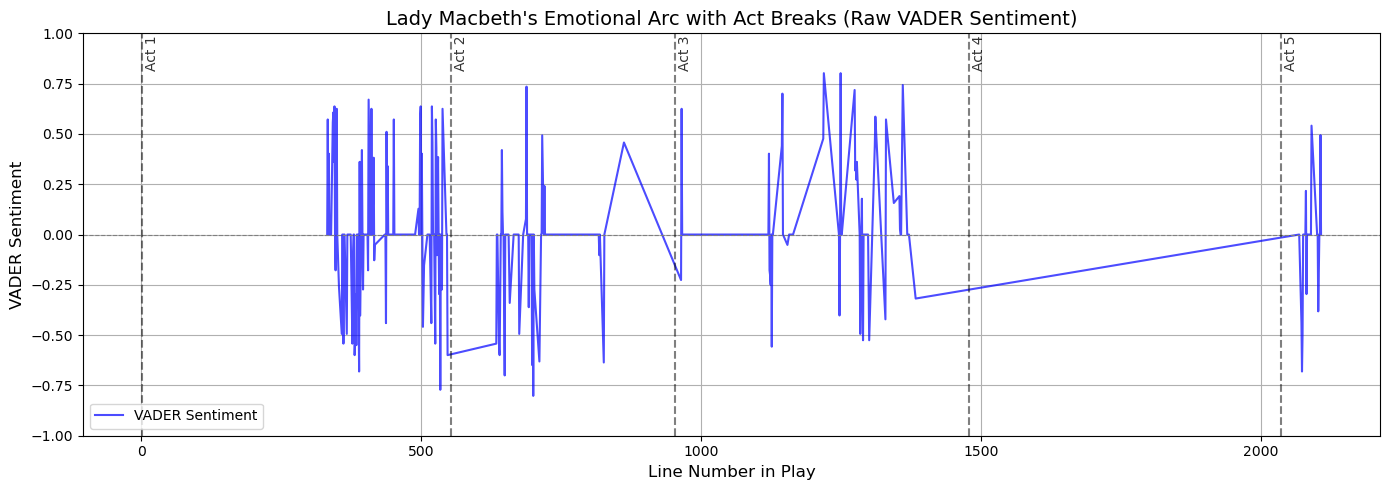

In [130]:
plt.figure(figsize=(14, 5))

plt.plot(lady_macbeth_only_df["line_number"], lady_macbeth_only_df["compound"], label="VADER Sentiment", color="blue", alpha=0.7)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

for act, start_line in act_starts.items():
    plt.axvline(start_line, color='black', linestyle='--', alpha=0.5)
    plt.text(start_line + 5, .9, f"Act {act}", rotation=90, verticalalignment='center', fontsize=10, alpha=0.8)

plt.title("Lady Macbeth's Emotional Arc with Act Breaks (Raw VADER Sentiment)", fontsize=14)
plt.xlabel("Line Number in Play", fontsize=12)
plt.ylabel("VADER Sentiment", fontsize=12)
plt.ylim(-1, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

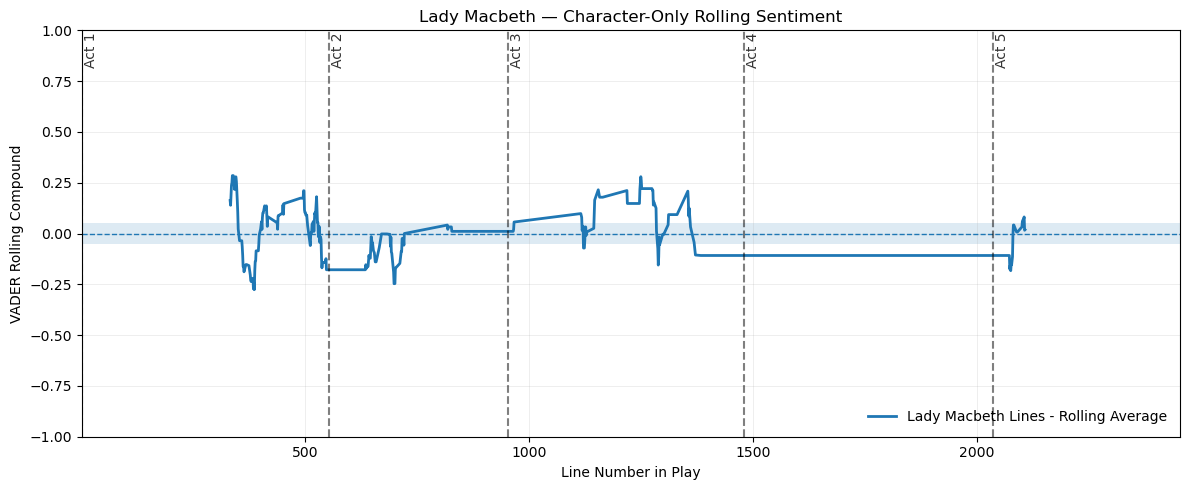

In [131]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(lady_macbeth_only_df['line_number'], lady_macbeth_only_df['rolling_compound'], linewidth=2, label='Lady Macbeth Lines - Rolling Average')

ax.axhspan(-0.05, 0.05, alpha=0.15, zorder=0)
ax.axhline(0, linestyle='--', linewidth=1)

ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())
ax.set_xlabel('Line Number in Play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title('Lady Macbeth — Character-Only Rolling Sentiment')

for act, start_line in act_starts.items():
    plt.axvline(start_line, color='black', linestyle='--', alpha=0.5)
    plt.text(start_line + 5, 0.9, f"Act {act}", rotation=90, verticalalignment='center', fontsize=10, alpha=0.8)
    
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

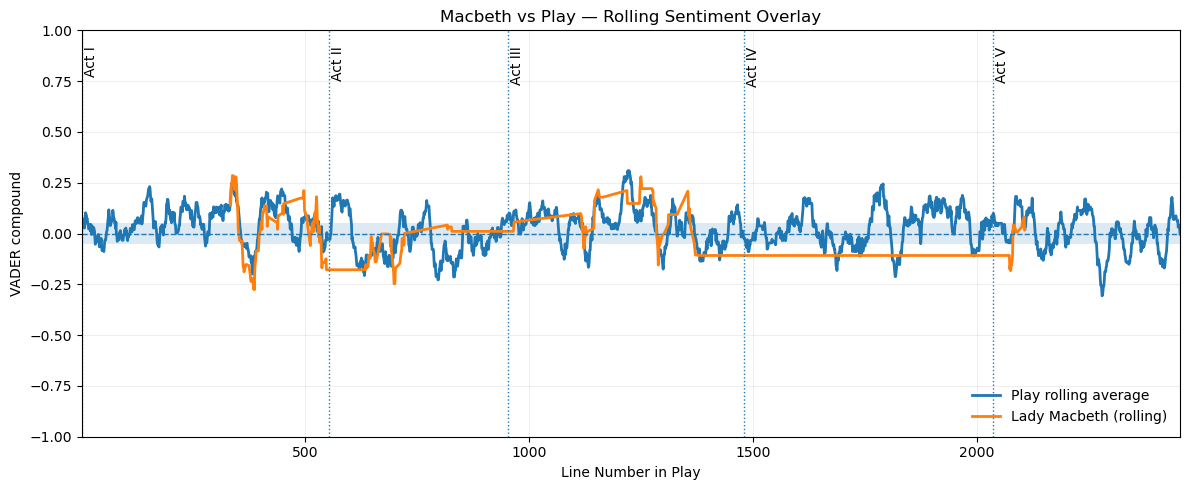

In [132]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(macbeth_full_text_df['line_number'], macbeth_full_text_df['play_rolling_compound_wide'], linewidth=2, label='Play rolling average')
ax.plot(lady_macbeth_only_df['line_number'], lady_macbeth_only_df['rolling_compound'], linewidth=2, label="Lady Macbeth (rolling)")

ax.axhspan(-0.05, 0.05, alpha=0.15, zorder=0)
ax.axhline(0, linestyle='--', linewidth=1)

ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(), macbeth_full_text_df['line_number'].max())
ax.set_xlabel('Line Number in Play')
ax.set_ylabel('VADER compound')
ax.set_title("Macbeth vs Play — Rolling Sentiment Overlay")

act_starts = macbeth_full_text_df.groupby('act')['line_number'].min()
roman = {1:'I',2:'II',3:'III',4:'IV',5:'V'}
for a, ln in act_starts.items():
    ax.axvline(ln, linestyle=':', linewidth=1)
    ax.text(ln + 5, 0.92*ax.get_ylim()[1], f'Act {roman.get(int(a), a)}',
            rotation=90, va='top', ha='left')

ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

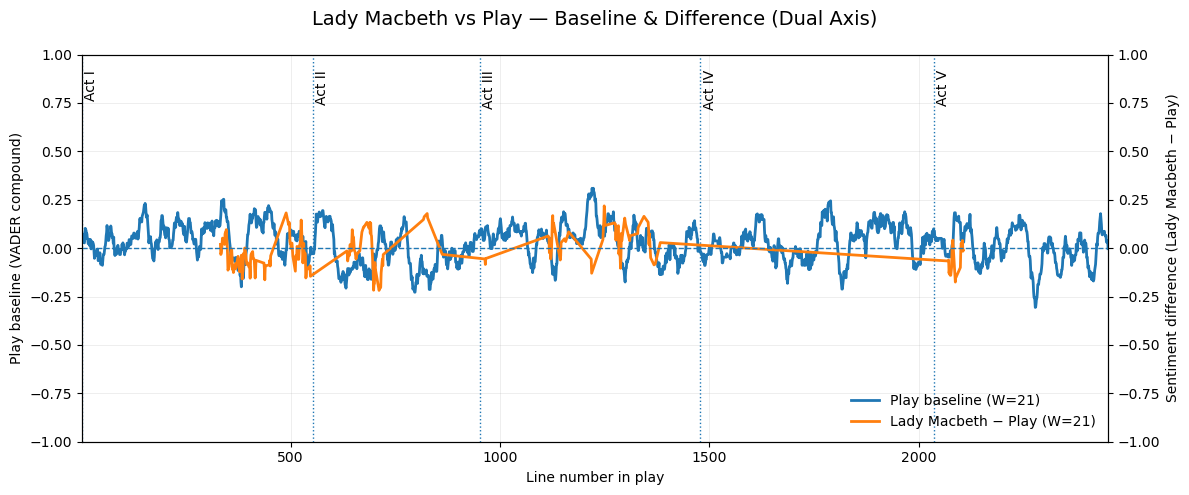

In [133]:
fig, ax1 = plt.subplots(figsize=(12,5))

ln1, = ax1.plot(
    macbeth_full_text_df['line_number'], macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, label='Play baseline (W=21)'
)
ax1.set_xlabel('Line number in play')
ax1.set_ylabel('Play baseline (VADER compound)')
ax1.set_xlim(macbeth_full_text_df['line_number'].min(), macbeth_full_text_df['line_number'].max())
ax1.set_ylim(-1, 1)
ax1.grid(True, linewidth=0.5, alpha=0.3)

ax2 = ax1.twinx()
ln2, = ax2.plot(
    lady_macbeth_only_df['line_number'], lady_macbeth_only_df['diff_vs_play_w21'],
    color='tab:orange', linewidth=2, label='Lady Macbeth − Play (W=21)'
)
ax2.axhline(0, linestyle='--', linewidth=1)
ax2.set_ylabel('Sentiment difference (Lady Macbeth − Play)')
ax2.set_ylim(-1, 1)

for act, start in act_starts.items():
    ax1.axvline(start, linestyle=':', linewidth=1)
    ax1.text(
        start + 5, 0.92 * ax1.get_ylim()[1],
        f'Act {roman[act]}', rotation=90, va='top', ha='left'
    )

lines = [ln1, ln2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right', frameon=False)

fig.suptitle("Lady Macbeth vs Play — Baseline & Difference (Dual Axis)", fontsize=14)
fig.tight_layout()
plt.show()

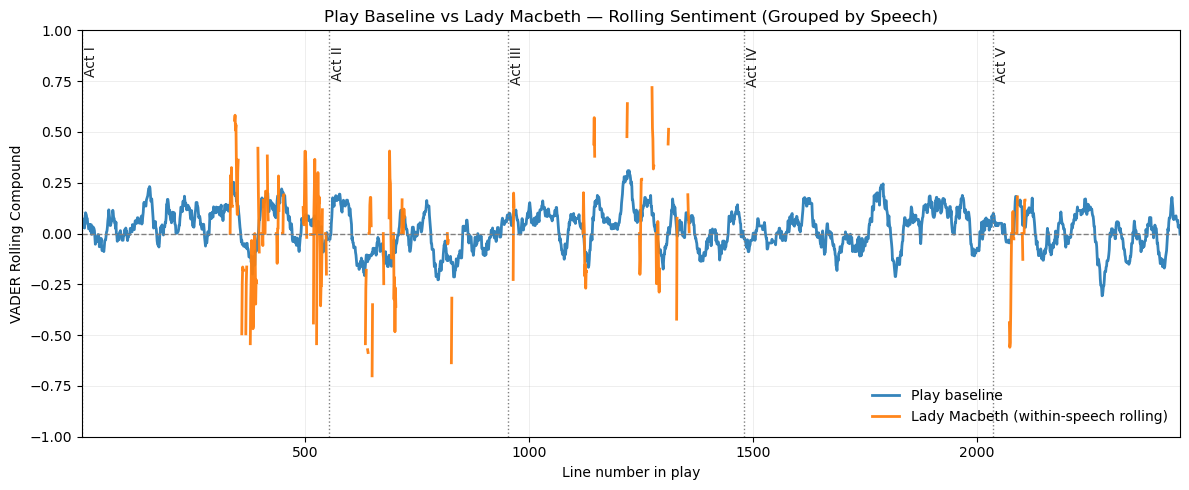

In [134]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in lady_macbeth_only_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Lady Macbeth (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Lady Macbeth — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

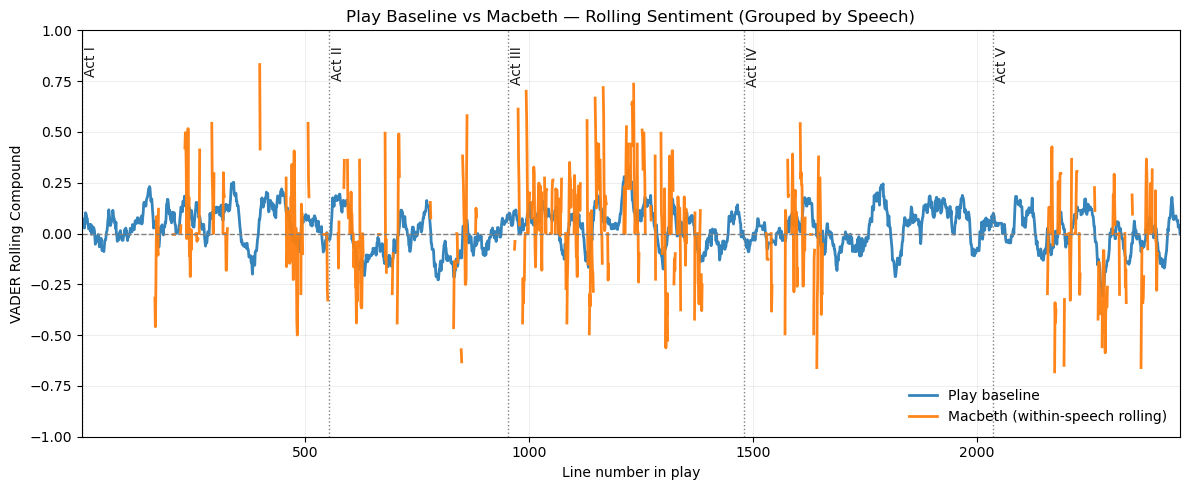

In [135]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in macbeth_only_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Macbeth (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Macbeth — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

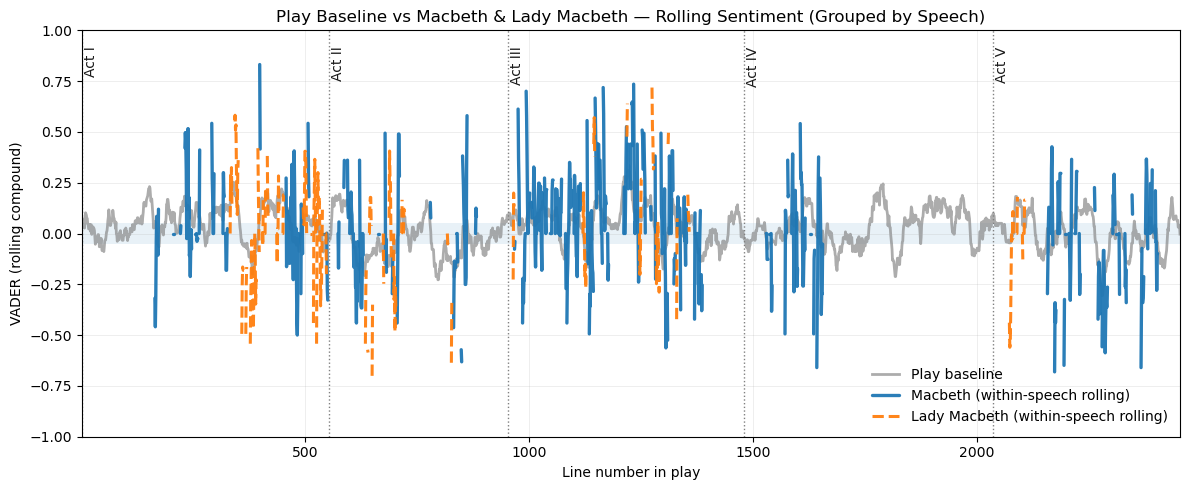

In [136]:
fig, ax = plt.subplots(figsize=(12,5))

baseline_c = 'gray'
macbeth_c = 'tab:blue'
lady_c = 'tab:orange'

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color=baseline_c, linestyle='-', linewidth=2, alpha=0.65,
    label='Play baseline', zorder=1
)

def plot_segments(df, value_col, label, *, ax, color, linestyle='-', lw=2.2, alpha=0.95):
    first = True
    for _, g in df.sort_values('line_number').groupby('speech_id', sort=False):
        ax.plot(
            g['line_number'], g[value_col],
            color=color, linestyle=linestyle, linewidth=lw, alpha=alpha,
            solid_capstyle='round',
            label=label if first else "", zorder=2
        )
        first = False

val_col = 'rolling_within_speech'  # adjust if you named it differently

plot_segments(macbeth_only_df,      val_col, 'Macbeth (within-speech rolling)',
              ax=ax, color=macbeth_c, linestyle='-',  lw=2.4, alpha=0.95)
plot_segments(lady_macbeth_only_df, val_col, 'Lady Macbeth (within-speech rolling)',
              ax=ax, color=lady_c, linestyle='--', lw=2.2, alpha=0.95)

ax.axhspan(-0.05, 0.05, alpha=0.10, zorder=0)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start+5, 0.92*ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER (rolling compound)')
ax.set_title('Play Baseline vs Macbeth & Lady Macbeth — Rolling Sentiment (Grouped by Speech)')
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Malcolm's Lines and Emotional Arc Via VADER

In [137]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Malcolm.html"

In [138]:
response = requests.get(url)

In [139]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\nThis is the sergeant<br/>\r\nWho, like a good and hardy soldier, fought<br/>\r\n’Gainst my captivity.—Hail, brave friend!<br/>\r\nSay to the King the knowledge of the broil<br/>\r\nAs thou didst leave it.<br/>\r\nThe worthy Thane of Ross.<br/>\r\nMy liege,<br/>\r\nThey are not yet come back. But I have spoke<br/>\r\nWith one that saw him die, who did report<br/>\r\nThat very frankly he confessed his treasons,<br/>\r\nImplored your Highness’ pardon, and set forth<br/>\r\nA deep repentance. Nothing in his life<br/>\r\nBecame him like the leaving it. He died<br/>\r\nAs one that had been studied in his death<br/>\r\nTo throw away the dearest thing he owed<br/>\r\nAs ’twere a careless trifle.<br/>\r\nO, by whom?<br/>\r\nWhy do we hold our tongues,<br/>\r\nThat most may claim this argument for ours?<br/>\r\nNor our strong sorrow upon the foot of motion.<br/>\r\nSo all.<br/>\r\nWell contented.<br/>\r\nWhat will you do? Let’s 

In [140]:
malcolm_soup = BS(response.text, "html.parser")

In [141]:
malcolm_soup

<html>
<head>
<meta charset="utf-8"/>
</head>
<body>
This is the sergeant<br/>
Who, like a good and hardy soldier, fought<br/>
’Gainst my captivity.—Hail, brave friend!<br/>
Say to the King the knowledge of the broil<br/>
As thou didst leave it.<br/>
The worthy Thane of Ross.<br/>
My liege,<br/>
They are not yet come back. But I have spoke<br/>
With one that saw him die, who did report<br/>
That very frankly he confessed his treasons,<br/>
Implored your Highness’ pardon, and set forth<br/>
A deep repentance. Nothing in his life<br/>
Became him like the leaving it. He died<br/>
As one that had been studied in his death<br/>
To throw away the dearest thing he owed<br/>
As ’twere a careless trifle.<br/>
O, by whom?<br/>
Why do we hold our tongues,<br/>
That most may claim this argument for ours?<br/>
Nor our strong sorrow upon the foot of motion.<br/>
So all.<br/>
Well contented.<br/>
What will you do? Let’s not consort with them.<br/>
To show an unfelt sorrow is an office<br/>
Which the 

In [142]:
malcolm_lines = malcolm_soup.get_text()

In [143]:
malcolm_lines = malcolm_lines.splitlines()

In [144]:
malcolm_lines = [ln.strip() for ln in malcolm_lines if ln.strip()]

In [145]:
malcolm_lines

['This is the sergeant',
 'Who, like a good and hardy soldier, fought',
 '’Gainst my captivity.—Hail, brave friend!',
 'Say to the King the knowledge of the broil',
 'As thou didst leave it.',
 'The worthy Thane of Ross.',
 'My liege,',
 'They are not yet come back. But I have spoke',
 'With one that saw him die, who did report',
 'That very frankly he confessed his treasons,',
 'Implored your Highness’ pardon, and set forth',
 'A deep repentance. Nothing in his life',
 'Became him like the leaving it. He died',
 'As one that had been studied in his death',
 'To throw away the dearest thing he owed',
 'As ’twere a careless trifle.',
 'O, by whom?',
 'Why do we hold our tongues,',
 'That most may claim this argument for ours?',
 'Nor our strong sorrow upon the foot of motion.',
 'So all.',
 'Well contented.',
 'What will you do? Let’s not consort with them.',
 'To show an unfelt sorrow is an office',
 'Which the false man does easy. I’ll to England.',
 'This murderous shaft that’s shot'

In [146]:
malcolm_only_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(malcolm_lines)].copy()

In [147]:
malcolm_only_df.head()

,line_number,text,act,scene,scene_id,act_scene,play_neg,play_neu,play_pos,play_compound,play_vader_label,play_rolling_compound_wide,play_rolling_compound_narrow
16,17,This is the sergeant,1,2,2,"Act 1, Scene 2",0.000,1.000,0.000,0.0000,neu,0.022619,0.109973
17,18,"Who, like a good and hardy soldier, fought",1,2,2,"Act 1, Scene 2",0.160,0.278,0.562,0.7003,pos,0.022619,0.059300
18,19,"’Gainst my captivity.—Hail, brave friend!",1,2,2,"Act 1, Scene 2",0.000,0.303,0.697,0.7840,pos,0.044467,0.010000
19,20,Say to the King the knowledge of the broil,1,2,2,"Act 1, Scene 2",0.000,1.000,0.000,0.0000,neu,0.011343,0.078964
20,21,As thou didst leave it.,1,2,2,"Act 1, Scene 2",0.231,0.769,0.000,-0.0516,neg,0.043271,0.032545


In [148]:
malcolm_only_df = malcolm_only_df.reset_index(drop=True)

In [149]:
malcolm_only_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [150]:
malcolm_only_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [151]:
malcolm_only_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   line_number       204 non-null    int64  
 1   text              204 non-null    object 
 2   act               204 non-null    int64  
 3   scene             204 non-null    int64  
 4   scene_id          204 non-null    int64  
 5   act_scene         204 non-null    object 
 6   play_neg          204 non-null    float64
 7   play_neu          204 non-null    float64
 8   play_pos          204 non-null    float64
 9   play_compound     204 non-null    float64
 10  play_vader_label  204 non-null    object 
dtypes: float64(4), int64(4), object(3)
memory usage: 17.7+ KB


In [152]:
malcolm_only_df = malcolm_only_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [153]:
malcolm_only_df.head()

,line_number,text,act,scene,scene_id,act_scene,neg,neu,pos,compound,vader_label
0,17,This is the sergeant,1,2,2,"Act 1, Scene 2",0.000,1.000,0.000,0.0000,neu
1,18,"Who, like a good and hardy soldier, fought",1,2,2,"Act 1, Scene 2",0.160,0.278,0.562,0.7003,pos
2,19,"’Gainst my captivity.—Hail, brave friend!",1,2,2,"Act 1, Scene 2",0.000,0.303,0.697,0.7840,pos
3,20,Say to the King the knowledge of the broil,1,2,2,"Act 1, Scene 2",0.000,1.000,0.000,0.0000,neu
4,21,As thou didst leave it.,1,2,2,"Act 1, Scene 2",0.231,0.769,0.000,-0.0516,neg


In [154]:
malcolm_only_df['vader_label'].value_counts()

vader_label
neu    78
pos    75
neg    51
Name: count, dtype: int64

In [155]:
malcolm_only_df['compound'].min()

-0.8225

In [156]:
malcolm_only_df.loc[(malcolm_only_df.compound == -0.8225)]

,line_number,text,act,scene,scene_id,act_scene,neg,neu,pos,compound,vader_label
31,1755,Weep our sad bosoms empty.,4,3,20,"Act 4, Scene 3",0.811,0.189,0.0,-0.8225,neg


In [157]:
malcolm_only_df["compound"].max()

0.9042

In [158]:
malcolm_only_df.loc[(malcolm_only_df.compound == 0.9042)]

,line_number,text,act,scene,scene_id,act_scene,neg,neu,pos,compound,vader_label
48,1787,"Those precious motives, those strong knots of ...",4,3,20,"Act 4, Scene 3",0.0,0.309,0.691,0.9042,pos


In [159]:
emotional_highs_malcolm = malcolm_only_df[malcolm_only_df["compound"] >= high_threshold]

In [160]:
emotional_lows_malcolm = malcolm_only_df[malcolm_only_df["compound"]  <= low_threshold]

In [161]:
print("Emotional Highs:")
display(emotional_highs_malcolm[["line_number", "act", "scene", "compound", "text"]].head())

print("Emotional Lows:")
display(emotional_lows_malcolm[["line_number", "act", "scene", "compound", "text"]].head())

Emotional Highs:


,line_number,act,scene,compound,text
2,19,1,2,0.7840,"’Gainst my captivity.—Hail, brave friend!"
37,1768,4,3,0.8519,Was once thought honest. You have loved him well.
44,1780,4,3,0.7845,"Angels are bright still, though the brightest ..."
48,1787,4,3,0.9042,"Those precious motives, those strong knots of ..."
141,1932,4,3,0.7845,"He hath a heavenly gift of prophecy,"


Emotional Lows:


,line_number,act,scene,compound,text
31,1755,4,3,-0.8225,Weep our sad bosoms empty.
155,1999,4,3,-0.7650,Give sorrow words. The grief that does not speak


In [162]:
malcolm_only_df['rolling_compound'] = (
    malcolm_only_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [163]:
malcolm_only_df['rolling_intensity']=(
    malcolm_only_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [164]:
malcolm_only_df['rolling_volatility'] = (
    malcolm_only_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [165]:
malcolm_only_df['speech_id'] = (malcolm_only_df['line_number'].diff().gt(1)).cumsum()

In [166]:
malcolm_only_df['weighted_compound'] = (
    malcolm_only_df['compound'] * malcolm_only_df['compound'].abs()
)

In [167]:
malcolm_only_df['rolling_weighted'] = (
    malcolm_only_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [168]:
malcolm_only_df['is_pos'] = (malcolm_only_df['vader_label']=='pos').astype(int)

In [169]:
malcolm_only_df['is_neg'] = (malcolm_only_df['vader_label']=='neg').astype(int)

In [170]:
malcolm_only_df['roll_pos_minus_neg'] = (
    malcolm_only_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - malcolm_only_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [171]:
sentiment_difference = malcolm_only_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [172]:
malcolm_only_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [173]:
malcolm_only_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [174]:
malcolm_only_df['rolling_within_speech'] = (
     malcolm_only_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [175]:
malcolm_only_df.insert(1, 'speaker', 'Malcolm')

In [176]:
malcolm_only_df.head()

,line_number,speaker,text,act,scene,scene_id,act_scene,neg,neu,pos,...,rolling_volatility,speech_id,weighted_compound,rolling_weighted,is_pos,is_neg,roll_pos_minus_neg,diff_vs_play_w21,diff_vs_play_w11,rolling_within_speech
0,17,Malcolm,This is the sergeant,1,2,2,"Act 1, Scene 2",0.000,1.000,0.000,...,0.430519,0,0.000000,0.216061,0,0,0.333333,0.289564,0.202211,0.000000
1,18,Malcolm,"Who, like a good and hardy soldier, fought",1,2,2,"Act 1, Scene 2",0.160,0.278,0.562,...,0.429841,0,0.490420,0.185195,1,0,0.285714,0.244967,0.208286,0.350150
2,19,Malcolm,"’Gainst my captivity.—Hail, brave friend!",1,2,2,"Act 1, Scene 2",0.000,0.303,0.697,...,0.417496,0,0.614656,0.162046,1,0,0.250000,0.189671,0.224137,0.494767
3,20,Malcolm,Say to the King the knowledge of the broil,1,2,2,"Act 1, Scene 2",0.000,1.000,0.000,...,0.387295,0,0.000000,0.104121,0,0,0.111111,0.130179,0.062559,0.494767
4,21,Malcolm,As thou didst leave it.,1,2,2,"Act 1, Scene 2",0.231,0.769,0.000,...,0.366121,0,-0.002663,0.093709,0,1,0.100000,0.084099,0.094825,0.244133


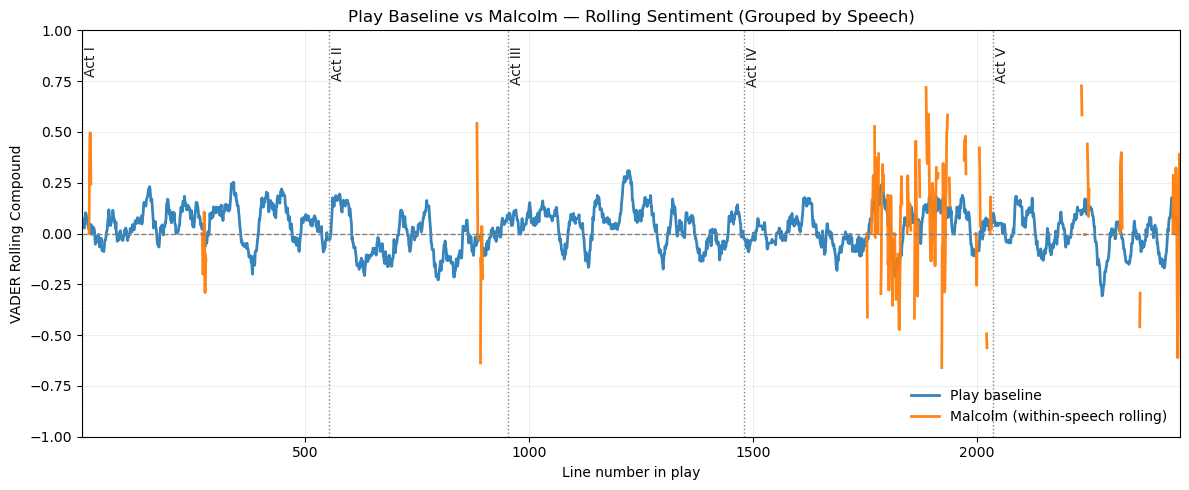

In [177]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in malcolm_only_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Malcolm (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Malcolm — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Macduff's Lines and Emotional Arc Via VADER

In [178]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Macduff.html"

In [179]:
response = requests.get(url)

In [180]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nWas it so late, friend, ere you went to bed<br/>\r\nThat you do lie so late?<br/>\r\nWhat three things does drink especially<br/>\r\nprovoke?<br/>\r\nI believe drink gave thee the lie last night.<br/>\r\nIs thy master stirring?<br/>\r\nOur knocking has awaked him. Here he comes.<br/>\r\nIs the King stirring, worthy thane?<br/>\r\nHe did command me to call timely on him.<br/>\r\nI have almost slipped the hour.<br/>\r\nI know this is a joyful trouble to you,<br/>\r\nBut yet ’tis one.<br/>\r\nI’ll make so bold to call,<br/>\r\nFor ’tis my limited service.<br/>\r\nO horror, horror, horror!<br/>\r\nTongue nor heart cannot conceive nor name thee!<br/>\r\nConfusion now hath made his masterpiece.<br/>\r\nMost sacrilegious murder hath broke ope<br/>\r\nThe Lord’s anointed temple and stole thence<br/>\r\nThe life o’ th’ building.<br/>\r\nApproach the chamber and destroy your sight<br/>\r\nWith a new Gorgon. Do not bid m

In [181]:
macduff_soup = BS(response.text, "html.parser")

In [182]:
macduff_soup

<html>
<head>
<meta charset="utf-8"/>
</head>
<body>
<br/>
Was it so late, friend, ere you went to bed<br/>
That you do lie so late?<br/>
What three things does drink especially<br/>
provoke?<br/>
I believe drink gave thee the lie last night.<br/>
Is thy master stirring?<br/>
Our knocking has awaked him. Here he comes.<br/>
Is the King stirring, worthy thane?<br/>
He did command me to call timely on him.<br/>
I have almost slipped the hour.<br/>
I know this is a joyful trouble to you,<br/>
But yet ’tis one.<br/>
I’ll make so bold to call,<br/>
For ’tis my limited service.<br/>
O horror, horror, horror!<br/>
Tongue nor heart cannot conceive nor name thee!<br/>
Confusion now hath made his masterpiece.<br/>
Most sacrilegious murder hath broke ope<br/>
The Lord’s anointed temple and stole thence<br/>
The life o’ th’ building.<br/>
Approach the chamber and destroy your sight<br/>
With a new Gorgon. Do not bid me speak.<br/>
See and then speak yourselves.  Awake, awake!<br/>
Ring the alarum 

In [183]:
macduff_lines = macduff_soup.get_text()

In [184]:
macduff_lines = macduff_lines.splitlines()

In [185]:
macduff_lines = [ln.strip() for ln in macduff_lines if ln.strip()]

In [186]:
macduff_lines

['Was it so late, friend, ere you went to bed',
 'That you do lie so late?',
 'What three things does drink especially',
 'provoke?',
 'I believe drink gave thee the lie last night.',
 'Is thy master stirring?',
 'Our knocking has awaked him. Here he comes.',
 'Is the King stirring, worthy thane?',
 'He did command me to call timely on him.',
 'I have almost slipped the hour.',
 'I know this is a joyful trouble to you,',
 'But yet ’tis one.',
 'I’ll make so bold to call,',
 'For ’tis my limited service.',
 'O horror, horror, horror!',
 'Tongue nor heart cannot conceive nor name thee!',
 'Confusion now hath made his masterpiece.',
 'Most sacrilegious murder hath broke ope',
 'The Lord’s anointed temple and stole thence',
 'The life o’ th’ building.',
 'Approach the chamber and destroy your sight',
 'With a new Gorgon. Do not bid me speak.',
 'See and then speak yourselves.  Awake, awake!',
 'Ring the alarum bell.—Murder and treason!',
 'Banquo and Donalbain, Malcolm, awake!',
 'Shake of

In [187]:
macduff_only_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(macduff_lines)].copy()

In [188]:
macduff_only_df = macduff_only_df.reset_index(drop=True)

In [189]:
macduff_only_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [190]:
macduff_only_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [191]:
macbeth_full_text_df.head(1)

,line_number,text,act,scene,scene_id,act_scene,play_neg,play_neu,play_pos,play_compound,play_vader_label,play_rolling_compound_wide,play_rolling_compound_narrow
0,1,When shall we three meet again?,1,1,1,"Act 1, Scene 1",0.0,1.0,0.0,0.0,neu,0.030909,0.056667


In [192]:
macduff_only_df = macduff_only_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [193]:
macduff_only_df.head(1)

,line_number,text,act,scene,scene_id,act_scene,neg,neu,pos,compound,vader_label
0,746,"Was it so late, friend, ere you went to bed",2,3,10,"Act 2, Scene 3",0.0,0.721,0.279,0.539,pos


In [194]:
macduff_only_df['vader_label'].value_counts()

vader_label
neu    94
pos    46
neg    33
Name: count, dtype: int64

In [195]:
emotional_highs_macduff = macduff_only_df[macduff_only_df["compound"] >= high_threshold]

In [196]:
emotional_lows_macduff = macduff_only_df[macduff_only_df["compound"]  <= low_threshold]

In [197]:
print("Emotional Highs:")
display(emotional_highs_macduff[["line_number", "act", "scene", "compound", "text"]].head())

print("Emotional Lows:")
display(emotional_lows_macduff[["line_number", "act", "scene", "compound", "text"]].head())

Emotional Highs:


,line_number,act,scene,compound,text
63,1793,4,3,0.7506,"Great tyranny, lay thou thy basis sure,"
128,2016,4,3,0.8070,That were most precious to me. Did heaven look on
134,2024,4,3,0.8268,"And braggart with my tongue! But, gentle heavens,"
151,2355,5,7,0.8519,"By this great clatter, one of greatest note"


Emotional Lows:


,line_number,act,scene,compound,text
14,797,2,3,-0.9080,"O horror, horror, horror!"
17,801,2,3,-0.8307,Most sacrilegious murder hath broke ope
70,1821,4,3,-0.9468,Of horrid hell can come a devil more damned


In [198]:
macduff_only_df['rolling_compound'] = (
    macduff_only_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [199]:
macduff_only_df['rolling_intensity']=(
    macduff_only_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [200]:
macduff_only_df['rolling_volatility'] = (
    macduff_only_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [201]:
macduff_only_df['speech_id'] = (macduff_only_df['line_number'].diff().gt(1)).cumsum()

In [202]:
macduff_only_df['weighted_compound'] = (
    macduff_only_df['compound'] * macduff_only_df['compound'].abs()
)

In [203]:
macduff_only_df['rolling_weighted'] = (
    macduff_only_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [204]:
macduff_only_df['is_pos'] = (macduff_only_df['vader_label']=='pos').astype(int)

In [205]:
macduff_only_df['is_neg'] = (macduff_only_df['vader_label']=='neg').astype(int)

In [206]:
macduff_only_df['roll_pos_minus_neg'] = (
    macduff_only_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - macduff_only_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [207]:
sentiment_difference = macduff_only_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [208]:
macduff_only_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [209]:
macduff_only_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [210]:
macduff_only_df['rolling_within_speech'] = (
     macduff_only_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [211]:
macduff_only_df.insert(1, 'speaker', 'Macduff')

In [212]:
macduff_only_df.head(1)

,line_number,speaker,text,act,scene,scene_id,act_scene,neg,neu,pos,...,rolling_volatility,speech_id,weighted_compound,rolling_weighted,is_pos,is_neg,roll_pos_minus_neg,diff_vs_play_w21,diff_vs_play_w11,rolling_within_speech
0,746,Macduff,"Was it so late, friend, ere you went to bed",2,3,10,"Act 2, Scene 3",0.0,0.721,0.279,...,0.311192,0,0.290521,0.0215,1,0,0.0,0.015831,-0.071941,0.539


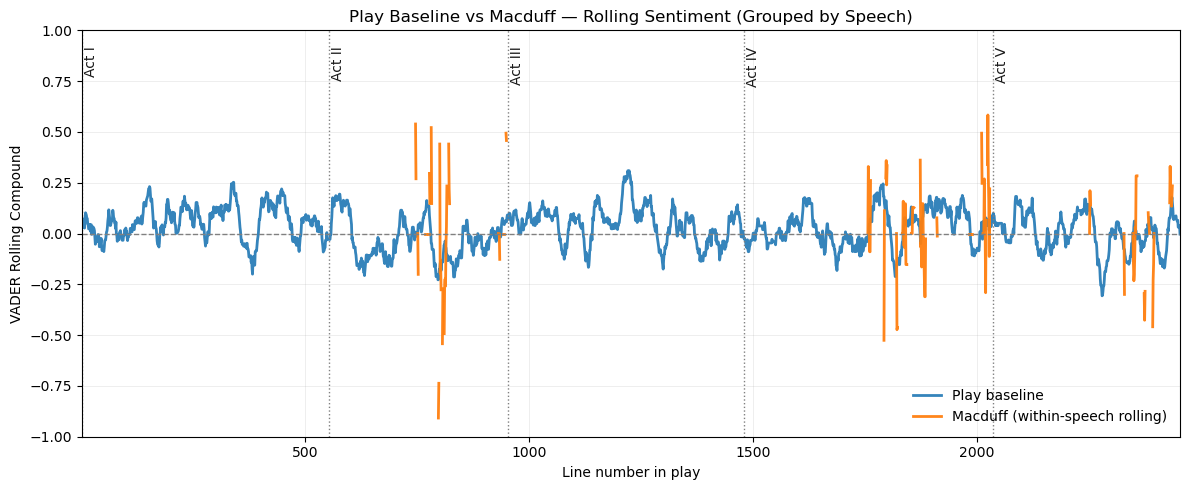

In [213]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in macduff_only_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Macduff (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Macduff — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Ross's Lines and Emotional Arc via VADER

In [214]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Ross.html"

In [215]:
response = requests.get(url)

In [216]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nGod save the King.<br/>\r\nFrom Fife, great king,<br/>\r\nWhere the Norweyan banners flout the sky<br/>\r\nAnd fan our people cold.<br/>\r\nNorway himself, with terrible numbers,<br/>\r\nAssisted by that most disloyal traitor,<br/>\r\nThe Thane of Cawdor, began a dismal conflict,<br/>\r\nTill that Bellona’s bridegroom, lapped in proof,<br/>\r\nConfronted him with self-comparisons,<br/>\r\nPoint against point, rebellious arm ’gainst arm,<br/>\r\nCurbing his lavish spirit. And to conclude,<br/>\r\nThe victory fell on us.<br/>\r\nThat now Sweno,<br/>\r\nThe Norways’ king, craves composition.<br/>\r\nNor would we deign him burial of his men<br/>\r\nTill he disbursèd at Saint Colme’s Inch<br/>\r\nTen thousand dollars to our general use.<br/>\r\nI’ll see it done.<br/>\r\nThe King hath happily received, Macbeth,<br/>\r\nThe news of thy success, and, when he reads<br/>\r\nThy personal venture in the rebels’ fight,<br/

In [217]:
ross_soup = BS(response.text, "html.parser")

In [218]:
ross_soup

<html>
<head>
<meta charset="utf-8"/>
</head>
<body>
<br/>
God save the King.<br/>
From Fife, great king,<br/>
Where the Norweyan banners flout the sky<br/>
And fan our people cold.<br/>
Norway himself, with terrible numbers,<br/>
Assisted by that most disloyal traitor,<br/>
The Thane of Cawdor, began a dismal conflict,<br/>
Till that Bellona’s bridegroom, lapped in proof,<br/>
Confronted him with self-comparisons,<br/>
Point against point, rebellious arm ’gainst arm,<br/>
Curbing his lavish spirit. And to conclude,<br/>
The victory fell on us.<br/>
That now Sweno,<br/>
The Norways’ king, craves composition.<br/>
Nor would we deign him burial of his men<br/>
Till he disbursèd at Saint Colme’s Inch<br/>
Ten thousand dollars to our general use.<br/>
I’ll see it done.<br/>
The King hath happily received, Macbeth,<br/>
The news of thy success, and, when he reads<br/>
Thy personal venture in the rebels’ fight,<br/>
His wonders and his praises do contend<br/>
Which should be thine or his. Si

In [219]:
ross_lines = ross_soup.get_text()

In [220]:
ross_lines = ross_lines.splitlines()

In [221]:
ross_lines = [ln.strip() for ln in ross_lines if ln.strip()]

In [222]:
ross_lines

['God save the King.',
 'From Fife, great king,',
 'Where the Norweyan banners flout the sky',
 'And fan our people cold.',
 'Norway himself, with terrible numbers,',
 'Assisted by that most disloyal traitor,',
 'The Thane of Cawdor, began a dismal conflict,',
 'Till that Bellona’s bridegroom, lapped in proof,',
 'Confronted him with self-comparisons,',
 'Point against point, rebellious arm ’gainst arm,',
 'Curbing his lavish spirit. And to conclude,',
 'The victory fell on us.',
 'That now Sweno,',
 'The Norways’ king, craves composition.',
 'Nor would we deign him burial of his men',
 'Till he disbursèd at Saint Colme’s Inch',
 'Ten thousand dollars to our general use.',
 'I’ll see it done.',
 'The King hath happily received, Macbeth,',
 'The news of thy success, and, when he reads',
 'Thy personal venture in the rebels’ fight,',
 'His wonders and his praises do contend',
 'Which should be thine or his. Silenced with that,',
 'In viewing o’er the rest o’ th’ selfsame day',
 'He finds

In [223]:
ross_only_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(ross_lines)].copy()

In [224]:
ross_only_df = ross_only_df.reset_index(drop=True)

In [225]:
ross_only_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [226]:
ross_only_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [227]:
ross_only_df = ross_only_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [228]:
ross_only_df.head(1)

,line_number,text,act,scene,scene_id,act_scene,neg,neu,pos,compound,vader_label
0,67,God save the King.,1,2,2,"Act 1, Scene 2",0.0,0.274,0.726,0.6486,pos


In [229]:
ross_only_df['vader_label'].value_counts()

vader_label
neu    51
neg    41
pos    40
Name: count, dtype: int64

In [230]:
emotional_highs_ross = ross_only_df[ross_only_df["compound"] >= high_threshold]

In [231]:
emotional_lows_ross = ross_only_df[ross_only_df["compound"]  <= low_threshold]

In [232]:
print("Emotional Highs:")
display(emotional_highs_ross[["line_number", "act", "scene", "compound", "text"]].head())

print("Emotional Lows:")
display(emotional_lows_ross[["line_number", "act", "scene", "compound", "text"]].head())

Emotional Highs:


,line_number,act,scene,compound,text
28,194,1,3,0.8402,"Thy praises in his kingdom’s great defense,"
30,200,1,3,0.8402,"And for an earnest of a greater honor,"
68,1674,4,2,0.8834,"He is noble, wise, judicious, and best knows"


Emotional Lows:


,line_number,act,scene,compound,text


In [233]:
ross_only_df['rolling_compound'] = (
    ross_only_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [234]:
ross_only_df['rolling_intensity']=(
    ross_only_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [235]:
ross_only_df['volatility'] = (
    ross_only_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [236]:
ross_only_df['speech_id'] = (ross_only_df['line_number'].diff().gt(1)).cumsum()

In [237]:
ross_only_df['weighted_compound'] = (
    ross_only_df['compound'] * ross_only_df['compound'].abs()
)

In [238]:
ross_only_df['rolling_weighted'] = (
    ross_only_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [239]:
ross_only_df['is_pos'] = (ross_only_df['vader_label']=='pos').astype(int)

In [240]:
ross_only_df['is_neg'] = (ross_only_df['vader_label']=='neg').astype(int)

In [241]:
ross_only_df['roll_pos_minus_neg'] = (
    ross_only_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - ross_only_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [242]:
sentiment_difference = ross_only_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [243]:
ross_only_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [244]:
ross_only_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [245]:
ross_only_df['rolling_within_speech'] = (
     ross_only_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [246]:
ross_only_df.insert(1, 'speaker', 'Ross')

In [247]:
ross_only_df.head(1)

,line_number,speaker,text,act,scene,scene_id,act_scene,neg,neu,pos,...,volatility,speech_id,weighted_compound,rolling_weighted,is_pos,is_neg,roll_pos_minus_neg,diff_vs_play_w21,diff_vs_play_w11,rolling_within_speech
0,67,Ross,God save the King.,1,2,2,"Act 1, Scene 2",0.0,0.274,0.726,...,0.367819,0,0.420682,0.114198,1,0,0.333333,0.127195,0.022788,0.6486


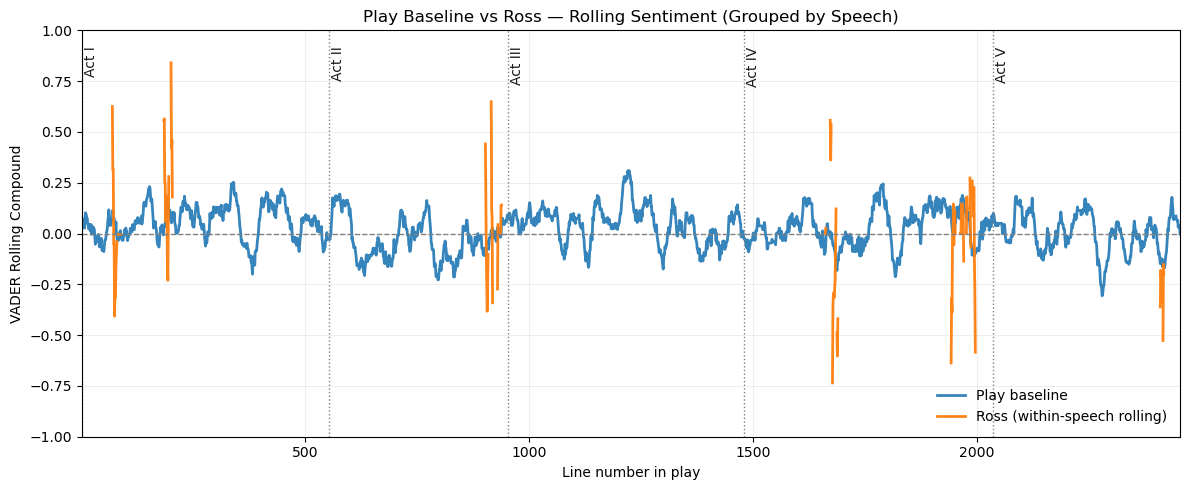

In [248]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in ross_only_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Ross (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Ross — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Banquo's Lines and Emotional Arc Via VADER

In [249]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Banquo.html"

In [250]:
response = requests.get(url)

In [251]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nHow far is ’t called to Forres?—What are these,<br/>\r\nSo withered, and so wild in their attire,<br/>\r\nThat look not like th’ inhabitants o’ th’ Earth<br/>\r\nAnd yet are on ’t?—Live you? Or are you aught<br/>\r\nThat man may question? You seem to understand me<br/>\r\nBy each at once her choppy finger laying<br/>\r\nUpon her skinny lips. You should be women,<br/>\r\nAnd yet your beards forbid me to interpret<br/>\r\nThat you are so.<br/>\r\nGood sir, why do you start and seem to fear<br/>\r\nThings that do sound so fair?—I’ th’ name of truth,<br/>\r\nAre you fantastical, or that indeed<br/>\r\nWhich outwardly you show? My noble partner<br/>\r\nYou greet with present grace and great prediction<br/>\r\nOf noble having and of royal hope,<br/>\r\nThat he seems rapt withal. To me you speak not.<br/>\r\nIf you can look into the seeds of time<br/>\r\nAnd say which grain will grow and which will not,<br/>\r\nSpeak

In [252]:
banquo_soup = BS(response.text, "html.parser")

In [253]:
banquo_soup

<html>
<head>
<meta charset="utf-8"/>
</head>
<body>
<br/>
How far is ’t called to Forres?—What are these,<br/>
So withered, and so wild in their attire,<br/>
That look not like th’ inhabitants o’ th’ Earth<br/>
And yet are on ’t?—Live you? Or are you aught<br/>
That man may question? You seem to understand me<br/>
By each at once her choppy finger laying<br/>
Upon her skinny lips. You should be women,<br/>
And yet your beards forbid me to interpret<br/>
That you are so.<br/>
Good sir, why do you start and seem to fear<br/>
Things that do sound so fair?—I’ th’ name of truth,<br/>
Are you fantastical, or that indeed<br/>
Which outwardly you show? My noble partner<br/>
You greet with present grace and great prediction<br/>
Of noble having and of royal hope,<br/>
That he seems rapt withal. To me you speak not.<br/>
If you can look into the seeds of time<br/>
And say which grain will grow and which will not,<br/>
Speak, then, to me, who neither beg nor fear<br/>
Your favors nor your hate.<

In [254]:
banquo_lines = banquo_soup.get_text()

In [255]:
banquo_lines = banquo_lines.splitlines()

In [256]:
banquo_lines = [ln.strip() for ln in banquo_lines if ln.strip()]

In [257]:
banquo_only_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(banquo_lines)].copy()

In [258]:
banquo_only_df = banquo_only_df.reset_index(drop=True)

In [259]:
banquo_only_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [260]:
banquo_only_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [261]:
banquo_only_df = banquo_only_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [262]:
banquo_only_df.head(1)

,line_number,text,act,scene,scene_id,act_scene,neg,neu,pos,compound,vader_label
0,131,"How far is ’t called to Forres?—What are these,",1,3,3,"Act 1, Scene 3",0.0,1.0,0.0,0.0,neu


In [263]:
banquo_only_df['vader_label'].value_counts()

vader_label
neu    54
pos    36
neg    20
Name: count, dtype: int64

In [264]:
emotional_highs_banquo = banquo_only_df[banquo_only_df["compound"] >= high_threshold]

In [265]:
emotional_lows_banquo = banquo_only_df[banquo_only_df["compound"]  <= low_threshold]

In [266]:
print("Emotional Highs:")
display(emotional_highs_banquo[["line_number", "act", "scene", "compound", "text"]].head())

print("Emotional Lows:")
display(emotional_lows_banquo[["line_number", "act", "scene", "compound", "text"]].head())

Emotional Highs:


,line_number,act,scene,compound,text
12,149,1,3,0.8481,You greet with present grace and great prediction
80,876,2,3,0.8555,"In the great hand of God I stand, and thence"


Emotional Lows:


,line_number,act,scene,compound,text


In [267]:
banquo_only_df['rolling_compound'] = (
    banquo_only_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [268]:
banquo_only_df['rolling_intensity']=(
    banquo_only_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [269]:
banquo_only_df['rolling_volatility'] = (
    banquo_only_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [270]:
banquo_only_df['speech_id'] = (banquo_only_df['line_number'].diff().gt(1)).cumsum()

In [271]:
banquo_only_df['weighted_compound'] = (
    banquo_only_df['compound'] * banquo_only_df['compound'].abs()
)

In [272]:
banquo_only_df['rolling_weighted'] = (
    banquo_only_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [273]:
banquo_only_df['is_pos'] = (banquo_only_df['vader_label']=='pos').astype(int)

In [274]:
banquo_only_df['is_neg'] = (banquo_only_df['vader_label']=='neg').astype(int)

In [275]:
banquo_only_df['roll_pos_minus_neg'] = (
    banquo_only_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - banquo_only_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [276]:
sentiment_difference = banquo_only_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [277]:
banquo_only_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [278]:
banquo_only_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [279]:
banquo_only_df['rolling_within_speech'] = (
     banquo_only_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [280]:
banquo_only_df.insert(1, 'speaker', 'Banquo')

In [281]:
banquo_only_df.head(1)

,line_number,speaker,text,act,scene,scene_id,act_scene,neg,neu,pos,...,rolling_volatility,speech_id,weighted_compound,rolling_weighted,is_pos,is_neg,roll_pos_minus_neg,diff_vs_play_w21,diff_vs_play_w11,rolling_within_speech
0,131,Banquo,"How far is ’t called to Forres?—What are these,",1,3,3,"Act 1, Scene 3",0.0,1.0,0.0,...,0.15906,0,0.0,-0.01265,0,0,-0.166667,-0.09704,-0.104208,0.0


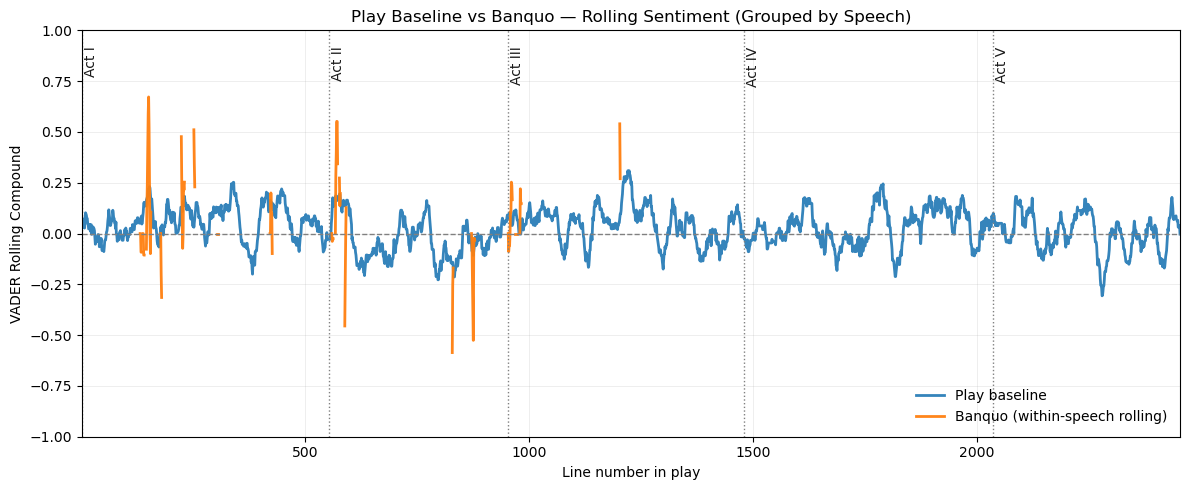

In [282]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in banquo_only_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Banquo (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Banquo — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Lennox's Lines and Emotional Arc Via VADER

In [283]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Lennox.html"

In [284]:
response = requests.get(url)

In [285]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nWhat a haste looks through his eyes!<br/>\r\nSo should he look that seems to speak things strange.<br/>\r\nGood morrow, noble sir.<br/>\r\nGoes the King hence today?<br/>\r\nThe night has been unruly. Where we lay,<br/>\r\nOur chimneys were blown down and, as they say,<br/>\r\nLamentings heard i’ th’ air, strange screams of death,<br/>\r\nAnd prophesying, with accents terrible,<br/>\r\nOf dire combustion and confused events<br/>\r\nNew hatched to th’ woeful time. The obscure bird<br/>\r\nClamored the livelong night. Some say the Earth<br/>\r\nWas feverous and did shake.<br/>\r\nMy young remembrance cannot parallel<br/>\r\nA fellow to it.<br/>\r\nWhat’s the matter?<br/>\r\nMean you his Majesty?<br/>\r\nThose of his chamber, as it seemed, had done ’t.<br/>\r\nTheir hands and faces were all badged with blood.<br/>\r\nSo were their daggers, which unwiped we found<br/>\r\nUpon their pillows. They stared and were di

In [286]:
lennox_soup = BS(response.text, "html.parser")

In [287]:
lennox_lines = lennox_soup.get_text()

In [288]:
lennox_lines = lennox_lines.splitlines()

In [289]:
lennox_lines = [ln.strip() for ln in lennox_lines if ln.strip()]

In [290]:
lennox_only_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(lennox_lines)].copy()

In [291]:
lennox_only_df = lennox_only_df.reset_index(drop=True)

In [292]:
lennox_only_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [293]:
lennox_only_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [294]:
lennox_only_df = lennox_only_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [295]:
lennox_only_df.head(3)

,line_number,text,act,scene,scene_id,act_scene,neg,neu,pos,compound,vader_label
0,64,What a haste looks through his eyes!,1,2,2,"Act 1, Scene 2",0.0,1.000,0.000,0.0000,neu
1,770,"Good morrow, noble sir.",2,3,10,"Act 2, Scene 3",0.0,0.253,0.747,0.7096,pos
2,783,Goes the King hence today?,2,3,10,"Act 2, Scene 3",0.0,1.000,0.000,0.0000,neu


In [296]:
lennox_only_df['vader_label'].value_counts()

vader_label
neu    35
neg    17
pos    16
Name: count, dtype: int64

In [297]:
emotional_highs_lennox = lennox_only_df[lennox_only_df["compound"] >= high_threshold]

In [298]:
emotional_lows_lennox = lennox_only_df[lennox_only_df["compound"]  <= low_threshold]

In [299]:
print("Emotional Highs:")
display(emotional_highs_lennox[["line_number", "act", "scene", "compound", "text"]].head())

print("Emotional Lows:")
display(emotional_lows_lennox[["line_number", "act", "scene", "compound", "text"]].head())

Emotional Highs:


,line_number,act,scene,compound,text


Emotional Lows:


,line_number,act,scene,compound,text
28,1427,3,6,-0.765,"Was pitied of Macbeth; marry, he was dead."


In [300]:
lennox_only_df['rolling_compound'] = (
    lennox_only_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [301]:
lennox_only_df['rolling_intensity']=(
    lennox_only_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [302]:
lennox_only_df['rolling_volatility'] = (
    lennox_only_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [303]:
lennox_only_df['speech_id'] = (lennox_only_df['line_number'].diff().gt(1)).cumsum()

In [304]:
lennox_only_df['weighted_compound'] = (
    lennox_only_df['compound'] * lennox_only_df['compound'].abs()
)

In [305]:
lennox_only_df['rolling_weighted'] = (
    lennox_only_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [306]:
lennox_only_df['is_pos'] = (lennox_only_df['vader_label']=='pos').astype(int)

In [307]:
lennox_only_df['is_neg'] = (lennox_only_df['vader_label']=='neg').astype(int)

In [308]:
lennox_only_df['roll_pos_minus_neg'] = (
    lennox_only_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - lennox_only_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [309]:
sentiment_difference = lennox_only_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [310]:
lennox_only_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [311]:
lennox_only_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [312]:
lennox_only_df['rolling_within_speech'] = (
     lennox_only_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [313]:
lennox_only_df.insert(1, 'speaker', 'Lennox')

In [314]:
lennox_only_df.head(1)

,line_number,speaker,text,act,scene,scene_id,act_scene,neg,neu,pos,...,rolling_volatility,speech_id,weighted_compound,rolling_weighted,is_pos,is_neg,roll_pos_minus_neg,diff_vs_play_w21,diff_vs_play_w11,rolling_within_speech
0,64,Lennox,What a haste looks through his eyes!,1,2,2,"Act 1, Scene 2",0.0,1.0,0.0,...,0.409688,0,0.0,0.046048,0,0,0.0,-0.000731,-0.200383,0.0


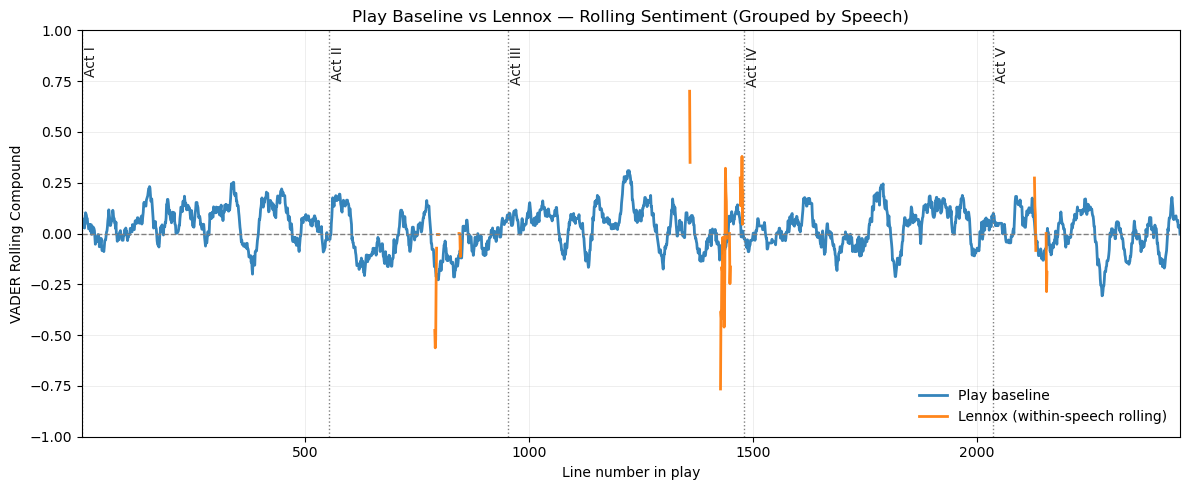

In [315]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in lennox_only_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Lennox (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Lennox — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Duncan's Lines and Emotional Arc Via VADER

In [316]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Duncan.html"

In [317]:
response = requests.get(url)

In [318]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nWhat bloody man is that? He can report,<br/>\r\nAs seemeth by his plight, of the revolt<br/>\r\nThe newest state.<br/>\r\nO valiant cousin, worthy gentleman!<br/>\r\nDismayed not this our captains, Macbeth and Banquo?<br/>\r\nSo well thy words become thee as thy wounds:<br/>\r\nThey smack of honor both.—Go, get him surgeons.<br/>\r\nWho comes here?<br/>\r\nWhence cam’st thou, worthy thane?<br/>\r\nGreat happiness!<br/>\r\nNo more that Thane of Cawdor shall deceive<br/>\r\nOur bosom interest. Go, pronounce his present death,<br/>\r\nAnd with his former title greet Macbeth.<br/>\r\nWhat he hath lost, noble Macbeth hath won.<br/>\r\nIs execution done on Cawdor? Are not<br/>\r\nThose in commission yet returned?<br/>\r\nThere’s no art<br/>\r\nTo find the mind’s construction in the face.<br/>\r\nHe was a gentleman on whom I built<br/>\r\nAn absolute trust.    O worthiest cousin,<br/>\r\nThe sin of my ingratitude eve

In [319]:
duncan_soup = BS(response.text, "html.parser")

In [320]:
duncan_lines = duncan_soup.get_text()

In [321]:
duncan_lines = duncan_lines.splitlines()

In [322]:
duncan_lines = [ln.strip() for ln in duncan_lines if ln.strip()]

In [323]:
duncan_only_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(duncan_lines)].copy()

In [324]:
duncan_only_df = duncan_only_df.reset_index(drop=True)

In [325]:
duncan_only_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [326]:
duncan_only_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [327]:
duncan_only_df = duncan_only_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [328]:
duncan_only_df.head(3)

,line_number,text,act,scene,scene_id,act_scene,neg,neu,pos,compound,vader_label
0,14,"What bloody man is that? He can report,",1,2,2,"Act 1, Scene 2",0.293,0.707,0.0,-0.4404,neg
1,15,"As seemeth by his plight, of the revolt",1,2,2,"Act 1, Scene 2",0.000,1.000,0.0,0.0000,neu
2,16,The newest state.,1,2,2,"Act 1, Scene 2",0.000,1.000,0.0,0.0000,neu


In [329]:
duncan_only_df['vader_label'].value_counts()

vader_label
pos    27
neu    26
neg    11
Name: count, dtype: int64

In [330]:
emotional_highs_duncan = duncan_only_df[duncan_only_df["compound"] >= high_threshold]

In [331]:
emotional_lows_duncan = duncan_only_df[duncan_only_df["compound"]  <= low_threshold]

In [332]:
print("Emotional Highs:")
display(emotional_highs_duncan[["line_number", "act", "scene", "compound", "text"]].head())

print("Emotional Lows:")
display(emotional_lows_duncan[["line_number", "act", "scene", "compound", "text"]].head())

Emotional Highs:


,line_number,act,scene,compound,text
8,80,1,2,0.8398,Great happiness!
52,432,1,6,0.7717,Which still we thank as love. Herein I teach you


Emotional Lows:


,line_number,act,scene,compound,text


In [333]:
duncan_only_df['rolling_compound'] = (
    duncan_only_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [334]:
duncan_only_df['rolling_intensity']=(
    duncan_only_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [335]:
duncan_only_df['rolling_volatility'] = (
    duncan_only_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [336]:
duncan_only_df['speech_id'] = (duncan_only_df['line_number'].diff().gt(1)).cumsum()

In [337]:
duncan_only_df['weighted_compound'] = (
    duncan_only_df['compound'] * duncan_only_df['compound'].abs()
)

In [338]:
duncan_only_df['rolling_weighted'] = (
    duncan_only_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [339]:
duncan_only_df['is_pos'] = (duncan_only_df['vader_label']=='pos').astype(int)

In [340]:
duncan_only_df['is_neg'] = (duncan_only_df['vader_label']=='neg').astype(int)

In [341]:
duncan_only_df['roll_pos_minus_neg'] = (
    duncan_only_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - duncan_only_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [342]:
sentiment_difference = duncan_only_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [343]:
duncan_only_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [344]:
duncan_only_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [345]:
duncan_only_df['rolling_within_speech'] = (
     duncan_only_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [346]:
duncan_only_df.insert(1, 'speaker', 'Duncan')

In [347]:
duncan_only_df.head(1)

,line_number,speaker,text,act,scene,scene_id,act_scene,neg,neu,pos,...,rolling_volatility,speech_id,weighted_compound,rolling_weighted,is_pos,is_neg,roll_pos_minus_neg,diff_vs_play_w21,diff_vs_play_w11,rolling_within_speech
0,14,Duncan,"What bloody man is that? He can report,",1,2,2,"Act 1, Scene 2",0.293,0.707,0.0,...,0.254265,0,-0.193952,0.067859,0,1,0.333333,0.099445,0.001844,-0.4404


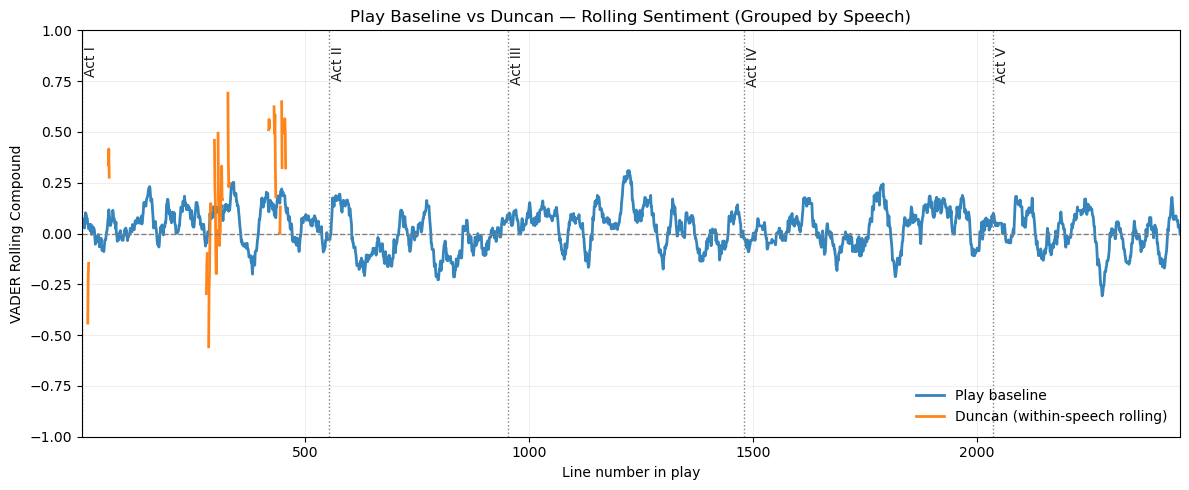

In [348]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in duncan_only_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Duncan (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Duncan — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Witch 1's Lines and Emotional Arc Via VADER

In [349]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_WITCHES.1.html"

In [350]:
response = requests.get(url)

In [351]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nWhen shall we three meet again?<br/>\r\nIn thunder, lightning, or in rain?<br/>\r\nWhere the place?<br/>\r\nI come, Graymalkin.<br/>\r\nFair is foul, and foul is fair;<br/>\r\nHover through the fog and filthy air.<br/>\r\nWhere hast thou been, sister?<br/>\r\nA sailor’s wife had chestnuts in her lap<br/>\r\nAnd munched and munched and munched. “Give me,” quoth I.<br/>\r\n“Aroint thee, witch,” the rump-fed runnion cries.<br/>\r\nHer husband’s to Aleppo gone, master o’ th’ Tiger;<br/>\r\nBut in a sieve I’ll thither sail,<br/>\r\nAnd, like a rat without a tail,<br/>\r\nI’ll do, I’ll do, and I’ll do.<br/>\r\nTh’ art kind.<br/>\r\nI myself have all the other,<br/>\r\nAnd the very ports they blow;<br/>\r\nAll the quarters that they know<br/>\r\nI’ th’ shipman’s card.<br/>\r\nI’ll drain him dry as hay.<br/>\r\nSleep shall neither night nor day<br/>\r\nHang upon his penthouse lid.<br/>\r\nHe shall live a man forbid.<b

In [352]:
witch_one_soup = BS(response.text, "html.parser")

In [353]:
witch_one_lines = witch_one_soup.get_text()

In [354]:
witch_one_lines = witch_one_lines.splitlines()

In [355]:
witch_one_lines = [ln.strip() for ln in witch_one_lines if ln.strip()]

In [356]:
first_witch_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(witch_one_lines)].copy()

In [358]:
first_witch_lines_df = first_witch_lines_df.reset_index(drop=True)

In [359]:
first_witch_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [360]:
first_witch_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [361]:
first_witch_lines_df = first_witch_lines_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [362]:
first_witch_lines_df.head()

,line_number,text,act,scene,scene_id,act_scene,neg,neu,pos,compound,vader_label
0,1,When shall we three meet again?,1,1,1,"Act 1, Scene 1",0.0,1.000,0.000,0.0000,neu
1,2,"In thunder, lightning, or in rain?",1,1,1,"Act 1, Scene 1",0.0,1.000,0.000,0.0000,neu
2,6,Where the place?,1,1,1,"Act 1, Scene 1",0.0,1.000,0.000,0.0000,neu
3,9,"I come, Graymalkin.",1,1,1,"Act 1, Scene 1",0.0,1.000,0.000,0.0000,neu
4,12,"Fair is foul, and foul is fair;",1,1,1,"Act 1, Scene 1",0.0,0.521,0.479,0.5574,pos


In [363]:
first_witch_lines_df['rolling_compound'] = (
    first_witch_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [364]:
first_witch_lines_df['rolling_intensity']=(
    first_witch_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [365]:
first_witch_lines_df['rolling_volatility'] = (
    first_witch_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [366]:
first_witch_lines_df['speech_id'] = (first_witch_lines_df['line_number'].diff().gt(1)).cumsum()

In [367]:
first_witch_lines_df['weighted_compound'] = (
    first_witch_lines_df['compound'] * first_witch_lines_df['compound'].abs()
)

In [368]:
first_witch_lines_df['rolling_weighted'] = (
    first_witch_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [369]:
first_witch_lines_df['is_pos'] = (first_witch_lines_df['vader_label']=='pos').astype(int)

In [370]:
first_witch_lines_df['is_neg'] = (first_witch_lines_df['vader_label']=='neg').astype(int)

In [371]:
first_witch_lines_df['roll_pos_minus_neg'] = (
    first_witch_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - first_witch_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [372]:
sentiment_difference = first_witch_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [373]:
first_witch_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [374]:
first_witch_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [375]:
first_witch_lines_df['rolling_within_speech'] = (
     first_witch_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [376]:
first_witch_lines_df.insert(1, 'speaker', 'First Witch')

In [377]:
first_witch_lines_df.head(1)

,line_number,speaker,text,act,scene,scene_id,act_scene,neg,neu,pos,...,rolling_volatility,speech_id,weighted_compound,rolling_weighted,is_pos,is_neg,roll_pos_minus_neg,diff_vs_play_w21,diff_vs_play_w11,rolling_within_speech
0,1,First Witch,When shall we three meet again?,1,1,1,"Act 1, Scene 1",0.0,1.0,0.0,...,0.0,0,0.0,0.051782,0,0,0.166667,0.061991,0.036233,0.0


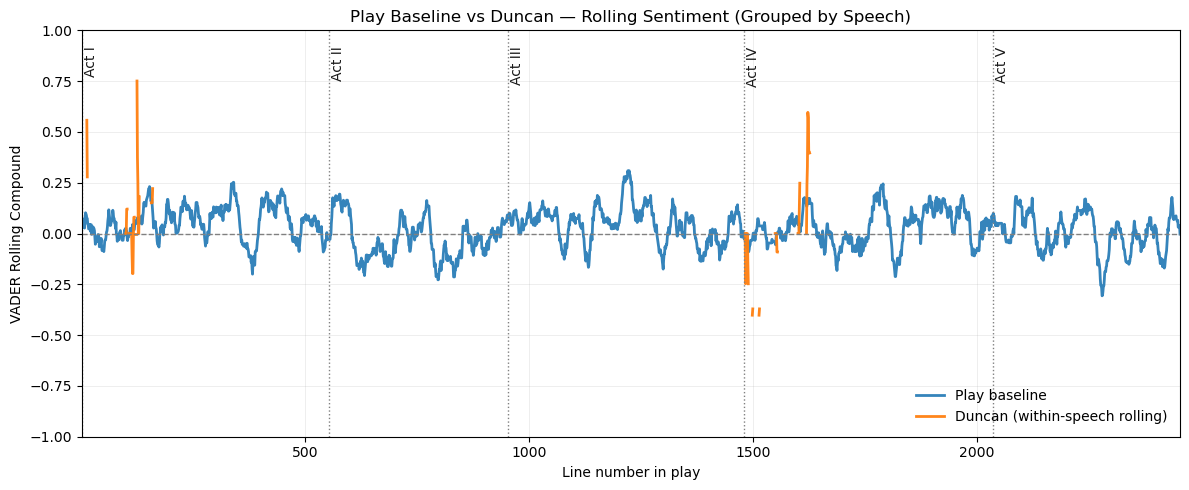

In [378]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in first_witch_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Duncan (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Duncan — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### The Porter's Lines and Emotional Arc Via VADER

In [379]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Porter.html"

In [380]:
response = requests.get(url)

In [381]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nHere’s a knocking indeed! If a man were<br/>\r\nporter of hell gate, he should have old turning the<br/>\r\nkey. Knock, knock, knock! Who’s there, i’<br/>\r\nth’ name of Beelzebub? Here’s a farmer that hanged<br/>\r\nhimself on th’ expectation of plenty. Come in time!<br/>\r\nHave napkins enough about you; here you’ll sweat<br/>\r\nfor ’t. Knock, knock! Who’s there, in th’<br/>\r\nother devil’s name? Faith, here’s an equivocator<br/>\r\nthat could swear in both the scales against either<br/>\r\nscale, who committed treason enough for God’s<br/>\r\nsake yet could not equivocate to heaven. O, come in,<br/>\r\nequivocator. Knock, knock, knock! Who’s<br/>\r\nthere? Faith, here’s an English tailor come hither for<br/>\r\nstealing out of a French hose. Come in, tailor. Here<br/>\r\nyou may roast your goose. Knock, knock!<br/>\r\nNever at quiet.—What are you?—But this place is<br/>\r\ntoo cold for hell. I’ll devil-po

In [382]:
porter_soup = BS(response.text, "html.parser")

In [383]:
porter_lines = porter_soup.get_text()

In [384]:
porter_lines = porter_lines.splitlines()

In [385]:
porter_lines = [ln.strip() for ln in porter_lines if ln.strip()]

In [386]:
porter_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(porter_lines)].copy()

In [387]:
porter_lines_df = porter_lines_df.reset_index(drop=True)

In [388]:
porter_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [389]:
porter_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [390]:
porter_lines_df = porter_lines_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [391]:
porter_lines_df.head()

,line_number,text,act,scene,scene_id,act_scene,neg,neu,pos,compound,vader_label
0,725,Here’s a knocking indeed! If a man were,2,3,10,"Act 2, Scene 3",0.000,1.000,0.0,0.0000,neu
1,726,"porter of hell gate, he should have old turnin...",2,3,10,"Act 2, Scene 3",0.338,0.662,0.0,-0.6808,neg
2,727,"key. Knock, knock, knock! Who’s there, i’",2,3,10,"Act 2, Scene 3",0.000,1.000,0.0,0.0000,neu
3,728,th’ name of Beelzebub? Here’s a farmer that ha...,2,3,10,"Act 2, Scene 3",0.000,1.000,0.0,0.0000,neu
4,729,himself on th’ expectation of plenty. Come in ...,2,3,10,"Act 2, Scene 3",0.000,1.000,0.0,0.0000,neu


In [392]:
porter_lines_df['rolling_compound'] = (
    porter_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [393]:
porter_lines_df['rolling_intensity']=(
    porter_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [394]:
porter_lines_df['rolling_volatility'] = (
    porter_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [395]:
porter_lines_df['speech_id'] = (porter_lines_df['line_number'].diff().gt(1)).cumsum()

In [396]:
porter_lines_df['weighted_compound'] = (
    porter_lines_df['compound'] * porter_lines_df['compound'].abs()
)

In [397]:
porter_lines_df['rolling_weighted'] = (
    porter_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [398]:
porter_lines_df['is_pos'] = (porter_lines_df['vader_label']=='pos').astype(int)

In [399]:
porter_lines_df['is_neg'] = (porter_lines_df['vader_label']=='neg').astype(int)

In [400]:
porter_lines_df['roll_pos_minus_neg'] = (
    porter_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - porter_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [401]:
sentiment_difference = porter_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [402]:
porter_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [403]:
porter_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [404]:
porter_lines_df['rolling_within_speech'] = (
     porter_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [405]:
porter_lines_df.insert(1, 'speaker', 'Porter')

In [406]:
porter_lines_df.head(1)

,line_number,speaker,text,act,scene,scene_id,act_scene,neg,neu,pos,...,rolling_volatility,speech_id,weighted_compound,rolling_weighted,is_pos,is_neg,roll_pos_minus_neg,diff_vs_play_w21,diff_vs_play_w11,rolling_within_speech
0,725,Porter,Here’s a knocking indeed! If a man were,2,3,10,"Act 2, Scene 3",0.0,1.0,0.0,...,0.39306,0,0.0,-0.077248,0,0,-0.166667,-0.135405,-0.131394,0.0


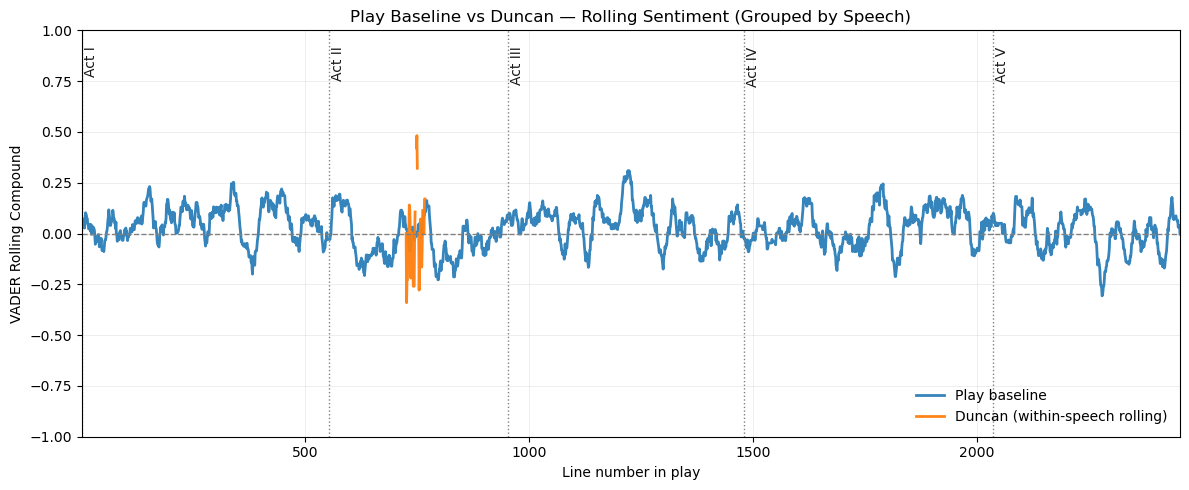

In [407]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in porter_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Duncan (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Duncan — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()